# Automatic Ticket Classification MileStone 1, 2 and 3
Due to the rise of usage of virtual systems, support ticket systems have come into prominence. Addressing the issue tickets to appropriate person or unit in the support team has critical importance in order to provide improved end user satisfaction while ensuring better allotment of support recourses. The assignment of help ticket to appropriate group is still manually performed. Especially at large organizations, the manual assignment is not applicable sufficiently. It is time consuming and requires human efforts. There may be mistakes due to human errors. Also resource consumption is carried out ineffectively because of the misaddressing.

 In this project, machine learning techniques and other algorithms which proven performance in text processing are used to classify the tickets to the correct assignment groups

## Objective Of The Project

The goal of the project is to build a classifier that can classify the tickets by analysing text.

The overall objective of this project are:

- Learn how to use different classification models. 
- Use transfer learning  to use pre-built models.
- Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.
- Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## Goals: 

- Exploring the given Data files 
- Understanding the structure of data 
- Missing points in data 
- Finding inconsistencies in the data 
- Visualizing different patterns  
- Visualizing different text features 
- Dealing with missing values 
- Text preprocessing  
- Creating word vocabulary from the corpus of report text data 
- Creating tokens as required
- Test the model and report as per evaluation metrics 
- Try different models
- Try different evaluation metrics  
- Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them 
- Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric 

## Dataset 
Details of the dataset is in the below link: <br>
 https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ/edit

The dataset consists of incident tickets information which are assigned to specfic groups.
This dataset has 8500 rows with 4 columns.

- Short description
- Description
- Caller
- Assignment group

The target column 'Assigmnent Group'  has 74 values.

In [0]:
!pip install langdetect
!pip install Unidecode
!pip install googletrans
!pip install spacy
!pip install plotly
!pip install xlrd
!pip install wordcloud
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

#### Import the necessary libraries

In [3]:
#Import the necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
from pandas import DataFrame
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from matplotlib import pyplot as plt
import string
import unidecode
import re
import spacy
from keras.regularizers import L1L2
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional,MaxPooling1D ,SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding, LSTM
from tensorflow.keras.models import Model
from langdetect import detect_langs
from langdetect import detect
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from langdetect import detect_langs
from langdetect import detect
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import zipfile
import datetime
import sys
from tqdm  import tqdm
tqdm.pandas()
import gc
import os

## Importing the data set 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
project_path = '/content/drive/My Drive/CapstoneProject/'
#Reading the data to a dataframe for further processing
tickets_corpus = pd.read_excel((project_path + 'input_data.xlsx'), encoding='utf8')
#
#Displaying the first 10 rows from the data
tickets_corpus.head(5)

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [0]:
#Reading the last 10 rows from the dataset
tickets_corpus.tail(10)

Short description  \
8490                         check status in purchasing   
8491                                     vpn for laptop   
8492                 hr_tool etime option not visitble    
8493           erp fi  - ob09, two accounts to be added   
8494  tablet needs reimaged due to multiple issues w...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8490  please contact ed pasgryowski (pasgryo) about ...  mpihysnw wrctgoan   
8491  \n\nreceived from: jxgobwrm.qkugdipo@gmail.com...  jxgobwrm qkugdipo   
8492                 hr_tool etime option not visitble   tmopbken ibzougsd   
8493  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8495  \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8490           GRP_29  
8491           GRP_34  
8492            GRP_0  
8493           GRP_10  
8494            GRP_3  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

We have successfully read the data and stored in the dataframe.
## Exploratory data Analysis

In [6]:
#Shape of the dataset
tickets_corpus.shape

(8500, 4)

In [7]:
tickets_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
tickets_corpus.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

The dataset comprises of 8500 rows and 4 columns. All columns are of type object containing textual information. Password reset is one of the most occuring tickets which reflects in the Short description column. The top occuring Description in the dataset is 'the', it is meaningless and we have to deal with it. Also we can see the top caller is 'bpctwhsn kzqsbmtp' and top or most frequent assignment group is GRP_0

### Check missing values in the dataset 

In [9]:
#Checking if the data set has any NULL OR NAN Values
tickets_corpus.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

We have very few NaN in the dataset in Short Description and Description column.

In [10]:
#displaying the data where 'Description' is null

tickets_corpus[tickets_corpus['Description'].isna()]

Short description Description             Caller Assignment group
4395  i am locked out of skype         NaN  viyglzfo ajtfzpkb            GRP_0

In [11]:
#displaying the data where 'Short description' is null

tickets_corpus[tickets_corpus['Short description'].isna()]

Short description                                        Description  \
2604               NaN  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...   
3383               NaN  \r\n-connected to the user system using teamvi...   
3906               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3910               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3915               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3921               NaN  -user unable  tologin to vpn.\r\n-connected to...   
3924               NaN  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...   
4341               NaN  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...   

                 Caller Assignment group  
2604  ohdrnswl rezuibdt           GRP_34  
3383  qftpazns fxpnytmk            GRP_0  
3906  awpcmsey ctdiuqwe            GRP_0  
3910  rhwsmefo tvphyura            GRP_0  
3915  hxripljo efzounig            GRP_0  
3921  cziadygo veiosxby            GRP_0  
3924  wvqgbdhm fwchqjor            GRP_0  
4341  eqmuniov ehxkcbgj            GRP_0

As per the above analysis, where we have missing values in the 'Description' column, the corresponding 'Short description' value is present. Also where 'Short description' column has NaN values, the corresponding 'Description' column values are present. Further processing, we are going to merge these two columns, so we no need to delete these NaN rows. But since most of them are from GRP_0, we are not keeping these rows since already the data is too much biased towards the GRP_0.

In [12]:
# We will Drop these rows from the dataset
tickets_corpus.dropna(inplace=True)
print ('Shape of the dataset after Dropping NAN values', tickets_corpus.shape)

Shape of the dataset after Dropping NAN values (8491, 4)


### Analysing each column of the Data!

**'Assignment group' column**

In [0]:
#Lets check the assignment groups and the corresponding ticket count in each group
group_ids = tickets_corpus['Assignment group'].str.split(expand=True).stack().value_counts()
print ('Number of Incidents under each unique incident group type\n', group_ids)

Number of Incidents under each unique incident group type
 GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_64       1
GRP_67       1
GRP_35       1
GRP_73       1
Length: 74, dtype: int64


There are totally 74 groups , and GRP_0 has the highest number of tickets 3968 out of 8500.

In [0]:
#Lets Select all ticket Assignment groups which have only one ticket
print (tickets_corpus[tickets_corpus.groupby("Assignment group")["Assignment group"].transform('size') == 1]['Assignment group'].unique())

['GRP_35' 'GRP_61' 'GRP_64' 'GRP_67' 'GRP_70' 'GRP_73']


we have around 6 assignment groups which have only one ticket sample.

**Short description Column**

In [13]:
#Length of each 'Short desccription'
tickets_corpus['short_desc_len'] = tickets_corpus['Short description'].astype(str).apply(len)

#Lets get the number of words in each 'Short description'
tickets_corpus['short_des_word_count'] = tickets_corpus['Short description'].apply(lambda x: len(str(x).split()))
tickets_corpus.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  short_desc_len  short_des_word_count  
0            GRP_0              11                     2  
1            GRP_0               7                     1  
2            GRP_0              18                     5  
3            GRP_0              29                     5  
4            GRP_0              12                     2

In [14]:
print ('Maximum length of single record in Short Description ', tickets_corpus['short_desc_len'].max())
print ('Minimum length of single record in Short Description ', tickets_corpus['short_desc_len'].min())
print ('Average length of single record in Short Description', tickets_corpus['short_desc_len'].mean())

print ('Maximum Word count of single record of Short Description', tickets_corpus['short_des_word_count'].max())
print ('Minimum Word count of single record of Short Description', tickets_corpus['short_des_word_count'].min())
print ('Average Word count of single record of Short Description', tickets_corpus['short_des_word_count'].mean())

Maximum length of single record in Short Description  159
Minimum length of single record in Short Description  1
Average length of single record in Short Description 47.26628194558945
Maximum Word count of single record of Short Description 28
Minimum Word count of single record of Short Description 1
Average Word count of single record of Short Description 6.93393004357555


In [15]:
#Total words in the 'Short Description'
short_des_all_words = list(tickets_corpus['Short description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words in Short Description Column', len(short_des_all_words))

Total words in Short Description Column 10571


**Let's see the Top 5 Short descriptions!**


In [16]:
pd.set_option('display.max_colwidth',None)   # To display full length value of columns

In [17]:
tickets_corpus[["Description","short_des_word_count"]].sort_values(by="short_des_word_count",ascending=False).head(5)

Description  \
2881                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 i did a po and it received with no problem, i try to ship thru pweaver in erp and it tells me the server is unable to process the request.   
3907                                                                                                                                                                                                                                                                                                                                                                                                                                                       name:mehrugshy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\ntelephone:\nsummary:i am not able to log into my vpn. when i am trying to open a new session it is going to the "your session is finished" page   
6307                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  mm#'s 7390081 and 6290061   
2541  someone in the service center was able to successfully add a zj partner to an existing customer master account in SID_34.\r\nwe set it up that only the 9 users assigned to the sd:cust_mast_partner_func_zj role would have add/edit/delete access to this partner function.\r\nhere is a summary of what happened per lillanna:\r\nhe (ujxvrlzg pkaegicn) was using SID_34 ecc. what is strange is that the system gave him a warning that he is not allowed to add zj partner function. he could not even save changes until he cleared the zj field. but it seems the system added the zj partner function anyway when he saved the account.  (the account was 81030623 and he added zj partner of 81907354.)\r\n\r\n   
3506                                                                                                                                                                                                                                                                                                                                                                                                                                                    name:bonhyb knepkhsw\nlanguage:\nbrowser:microsoft internet explorer\nemail:xziwkgeo.gdiraveu@gmail.com\ncustomer number:\ntelephone:\nsummary:i am trying to find an expense report to approve. i have an email that says i have one to approve. it is not showing up.   

      short_des_word_count  
2881                    28  
3907                    28  
6307                    27  
2541                    26  
3506                    26

**Description Column**

In [18]:
# Length of each description
tickets_corpus['Desc_len'] = tickets_corpus['Description'].astype(str).apply(len)

# we are temporarily creating a column in the dataframe for the number of words
tickets_corpus['Des_word_count'] = tickets_corpus['Description'].apply(lambda x: len(str(x).split(" ")))
tickets_corpus.head(5)

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                                                                                                                                                                                              Description  \
0  -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.   
1      \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind    
2                                                                                                                 \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest    
3                                                                                                                                                                                           unable to access hr_tool page   
4                                                                                                                                                                                                            skype error    

              Caller Assignment group  short_desc_len  short_des_word_count  \
0  spxjnwir pjlcoqds            GRP_0              11                     2   
1  hmjdrvpb komuaywn            GRP_0               7                     1   
2  eylqgodm ybqkwiam            GRP_0              18                     5   
3  xbkucsvz gcpydteq            GRP_0              29                     5   
4  owlgqjme qhcozdfx            GRP_0              12                     2   

   Desc_len  Des_word_count  
0       206              29  
1       194              23  
2        87               9  
3        29               5  
4        12               3

In [19]:
print ('Maximum length of single record of Description', tickets_corpus['Desc_len'].max())
print ('Minimum length of single record of Description', tickets_corpus['Desc_len'].min())
print ('Average length of single record of Description', tickets_corpus['Desc_len'].mean())

print ('Maximum Word count of single record of Description', tickets_corpus['Des_word_count'].max())
print ('Minimum Word count of single record of Description', tickets_corpus['Des_word_count'].min())
print ('Average Word count of single record of Description', tickets_corpus['Des_word_count'].mean())

Maximum length of single record of Description 13001
Minimum length of single record of Description 1
Average length of single record of Description 204.08173360028266
Maximum Word count of single record of Description 1417
Minimum Word count of single record of Description 1
Average Word count of single record of Description 28.88635025320928


In [20]:
#Total words in the 'Description' column
des_all_words = list(tickets_corpus['Description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words in Description Column', len(des_all_words))

Total words in Description Column 35007


**Lets see the Top 5 longest descriptions!**

In [21]:
tickets_corpus[["Description","Des_word_count"]].sort_values(by="Des_word_count",ascending=False).head(5)

Description  \
7345  we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). \r\n\r\nbased on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip\r\n\r\nwe are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling options), or if you have any further questions or concerns, please let us know either by corresponding to us via this ticket and delegating the ticket back to the soc, or by calling us at .\r\n\r\n1)full escalation for broadscanning alerts (explicit notification via a high priority ticket and phone call)\r\n2)autoresolve for broadscanning alerts directly to the portal (no explicit notification but events will be available for reporting purposes in the portal)\r\n\r\nsincerely,\r\nsecureworks soc\r\n\r\n=========================\r\nevent data\r\n=========================\r\nrelated events: \r\nevent id: 43589636\r\nevent summary: 20369 vid12631 suspicious executable file upload php http incoming\r\noccurrence count: 2\r\nevent count: 2\r\n\r\nhost and connection information\r\nsource ip: 46.161.9.35\r\nsource port: 52806\r\nsource ip geolocation: st pethrywrsburg, rus\r\ndestination ip: 172.20.10.37\r\ndestination port: 80\r\nconnection directionality: incoming\r\nprotocol: tcp\r\nhttp method: post\r\nhttp status code: 404\r\nuser agent: mozilla/5.0 (windows nt 6.1; rv:34.0) gecko/31211212 firefox/34.0\r\nhost: www.companyipg.com\r\nfull url path: /wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php\r\n\r\ndevice information\r\ndevice ip: 172.20.10.208\r\ndevice name: isensor02.company.com\r\nlog time: 2016-08-14 at 20:38:30 utc\r\naction: not blocked\r\nvendor eventid: 655375\r\ncvss score: -1 \r\nvendor priority: 3\r\nvendor version: 7\r\nvendor reference: vid, 12631\r\nfile name: wp-setup.php\r\n\r\nscwx event processing information\r\nsherlock rule id (sle): 891631\r\ninspector rule id: 277082\r\ninspector event id: 61024435\r\nontology id: 200020003203722280\r\nevent type id: 200020003203056732\r\nagent id: 103793\r\n\r\nevent detail:\r\n[**] [1:21131470:5] 20369 vid12631 suspicious executable file upload php http incoming [**]\r\n[classification: none] [priority: 3] [action: accept_passive] [impact_flag: 0] [impact: 0] [blocked: 2] [vlan: 0] [mpls label: 0] [pad2: 1]\r\n[sensor id: 602984][event id: 655375][time: 2582318221.714106]\r\n[xref => vid, 12631]\r\n[src ip: 46.161.9.35][dst ip: 172.20.10.37][sport/itype: 52806][dport/icode: 80][proto: 6]\r\n08/14/2016-20:38:30.714106 46.161.9.35:52806 -> 172.20.10.37:80\r\ntcp ttl:49 tos:0x68 id:4444 iplen:20 dgmlen:714 df\r\n***ap*** seq: 0x49c51796 ack: 0x9698e7c8 win: 0x73 tcplen: 32\r\ntcp options (3) => nop nop ts: 380683315 9237098 \r\n==pcap 1==\r\n\r\n\r\n[ex http_uri 9: /wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php]\r\n\r\n[ex http_hostname 10: www.companyipg.com]\r\n\r\n[o:security]\r\n\r\nascii packet(s):\r\n==pcap 1 ascii s==\r\n.......wz...........eh...\@.1.gm...#...%.f.pi..........sk2...........|..post./wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php.http/1.1..host:.www.companyipg.com..content-length:.297..accept-encoding:.gzip,.deflate..accept:.*/*..user-agent:.mozilla/5.0.(windows.nt.6.1;.rv:34.0).gecko/31211212.firefox/34.0..connection:.keep-alive..content-type:.multipart/form-data;.boundary=ba7336a47f

**Analyzing Caller Column**

Check the number of unique callers in the dataset

In [0]:
#Removing space between Caller Full Name to count unique callers
tickets_corpus['Caller']= tickets_corpus['Caller'].replace(" ","", regex=True)
Unique_Callers= tickets_corpus['Caller'].str.split(expand=True).stack().value_counts()
print ('Number of Unique callers in the Dataset', len(tickets_corpus['Caller'].str.split(expand=True).stack().value_counts()))

Number of Unique callers in the Dataset 2948


**Lets see the top 10 callers in raising tickets**

In [0]:
top_callers = tickets_corpus.groupby(['Caller']).size().nlargest(10)
print(top_callers)

Caller
bpctwhsnkzqsbmtp    810
ZkBogxibQsEJzdZO    151
fumkcsjisarmtlhy    134
rbozivdqgmlhrtvp     87
rkupnshbgsmzfojw     71
jloygrwhacvztedi     64
spxqmiryzpwgoqju     63
oldrctiubxurpsyi     57
olckhmvxpcqobjnd     54
dkmcfreganwmfvlg     51
dtype: int64


Only one caller has raised 810 tickets, rest of the callers are raised only < 200 tickets

**Lets check if any caller raised the tickets for multiple groups**

In [0]:
top_c = tickets_corpus['Caller'].groupby(tickets_corpus['Assignment group']).value_counts()
grp_caller =pd.DataFrame(top_c.groupby(level=0).nlargest(5).reset_index(level=0, drop=True))
multy_caller = grp_caller[grp_caller.Caller.duplicated()]
grp_caller.head(20)

Caller
Assignment group Caller                  
GRP_0            fumkcsjisarmtlhy     132
                 rbozivdqgmlhrtvp      86
                 olckhmvxpcqobjnd      54
                 efbwiadpdicafxhv      45
                 mfeyoulindobtzpw      13
GRP_1            bpctwhsnkzqsbmtp       6
                 jloygrwhacvztedi       4
                 jyoqwxhzclhxsoqy       3
                 spxqmiryzpwgoqju       3
                 kbnfxpsygehxzayq       2
GRP_10           bpctwhsnkzqsbmtp      60
                 ihfkwzjderbxoyqk       6
                 dizquolfhlykecxa       5
                 gnasmtvxcwxtsvkm       3
                 hlrmufzxqcdzierm       3
GRP_11           ctvaejbomjcerqwo       7
                 tghrloksjbgcvlmf       2
                 vlymsnejwhlqxcst       2
                 dnwfhpylzqbldipk       1
                 fbgetcznjlsvxura       1

In [0]:
multy_caller_unique = [idx[1] for idx in multy_caller.index[multy_caller.Caller.unique()]]
multy_caller_unique

['hlrmufzxqcdzierm',
 'fbgetcznjlsvxura',
 'gnasmtvxcwxtsvkm',
 'ihfkwzjderbxoyqk',
 'tqfnalpjqyoscnge',
 'fmqubnvskcxpeyiv',
 'tghrloksjbgcvlmf',
 'jwqyxbzsadpvilqu',
 'nuhfwpljojcwxser',
 'oldrctiubxurpsyi',
 'vlymsnejwhlqxcst',
 'dkmcfreganwmfvlg',
 'bpctwhsnkzqsbmtp',
 'spxqmiryzpwgoqju',
 'obanjrhgrnafleys']

The above callers have raised tickets for multiple groups.

As per our above analysis, we dont see any significance relationship between the 'Caller' and group to which tickets are assigned. so for the model building, we may can avoid this column

### Visualization

#### Visualizing the Frequency of words in Description

In [22]:
init_notebook_mode(connected=True)

all_words = tickets_corpus['Description'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Description'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

#### Visualizing the Frequency of words in Short description

In [23]:
all_words = tickets_corpus['Short description'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Short Description'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

#### Distribution of tickets by the Group

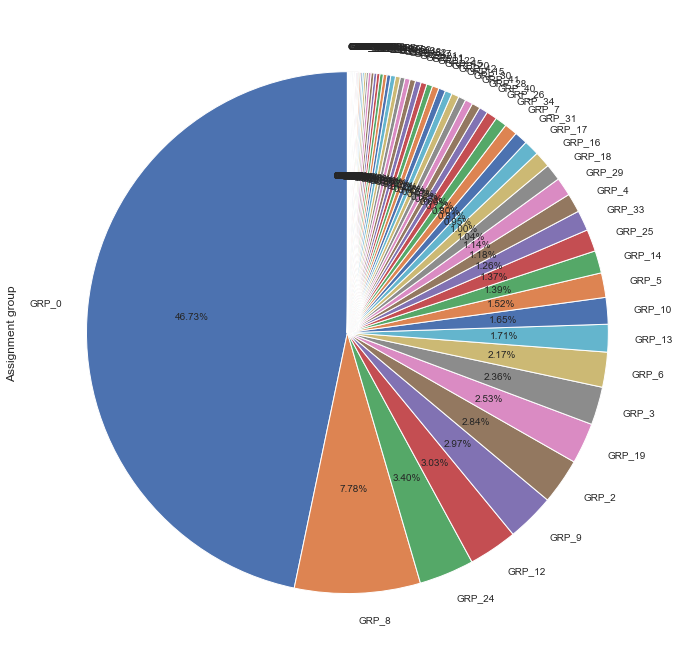

In [0]:
plt.figure(figsize=(20,12))
tickets_corpus["Assignment group"].value_counts().plot.pie(autopct='%1.2f%%', fontsize=10, startangle=90)

From the above plot we can see that 46.73% of the data is for GRP_0

Some importany insights from the above plot- group 0,8,24, 12, 9, 2, 19 have highest number of cases tagged. Data is highly biased towards GRP_0 incidents

#### Short Description Word count visualization

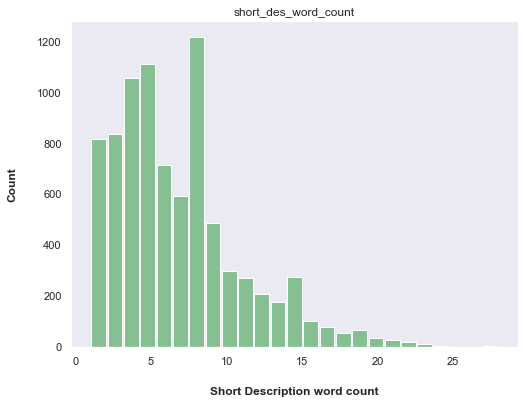

In [0]:
ax = tickets_corpus.hist(column='short_des_word_count', bins=25, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Set x-axis label
    x.set_xlabel("Short Description word count", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

#### Description word count visualization

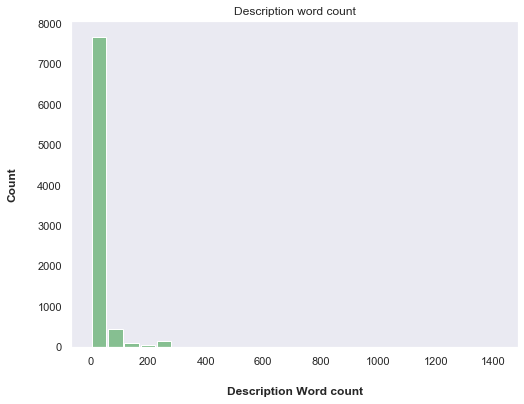

In [0]:
ax = tickets_corpus.hist(column='Des_word_count', bins=25, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Set x-axis label
    x.set_xlabel("Description Word count", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)
    x.set_title("Description word count")

#### Lets visualize no.of tickets in each Assignment group.

Text(0, 0.5, 'No.of tickets')

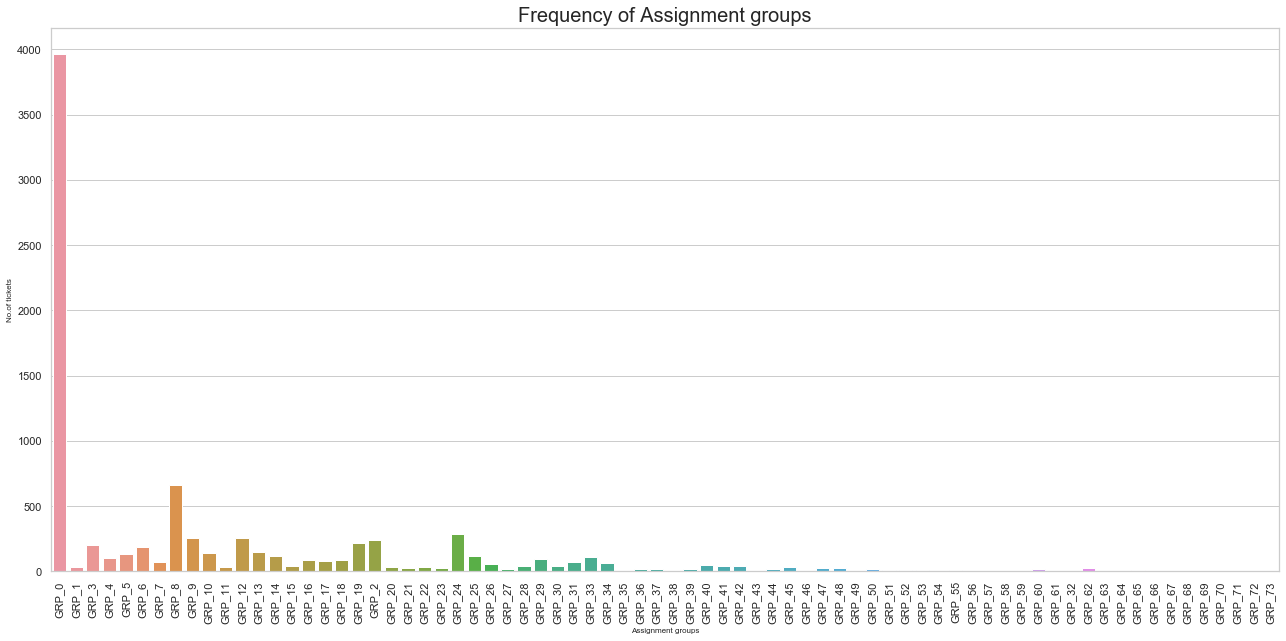

In [0]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.countplot("Assignment group",data=tickets_corpus)
plt.xticks(rotation=90)
plt.title("Frequency of Assignment groups",fontsize=20)
plt.xlabel("Assignment groups",fontsize=8)
plt.ylabel("No.of tickets",fontsize=8)

### Let's merge the 'Short description' and 'Description' columns before preprocessing.

In [0]:
tickets_corpus.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'short_desc_len', 'short_des_word_count', 'Desc_len', 'Des_word_count'],
      dtype='object')

In [0]:
# Merge the Short descrition and Description column texts to create a new column
tickets_corpus.insert(loc=8, 
              column='ticket_summary', 
              allow_duplicates=True, 
              value=list(tickets_corpus['Short description'].str.strip() + ' ' + tickets_corpus['Description'].str.strip()))

In [0]:
#check the merged column is created properly or not
tickets_corpus['ticket_summary'].head()

0    login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.
1                     outlook received from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind
2                                                                                                                     cant log in to vpn received from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
3                                                                                                                                                                           unable to access hr_tool page unable to access hr_tool page
4                                                                       

#### Let's analyse the non-english data present in the dataset.

In [0]:
tickets_corpus['Language'] = tickets_corpus['ticket_summary'].apply(detect)

In [0]:
# validating the languages present in the 'text' column using google language detection package.
print ('Various languages detected includes', tickets_corpus.groupby(['Language']).size())
print ('Total number of records with multiple languages detected is', len(tickets_corpus['Language']))
print ('Other than english langauge records are', tickets_corpus[~tickets_corpus['Language'].str.contains("en", na=False)].count())

Various languages detected includes Language
af     272
ca      51
cs       3
cy       6
da      72
de     380
en    7060
es      49
et       4
fi       4
fr     110
hr       4
hu       2
id       5
it     136
lt       2
nl      73
no      84
pl      30
pt      23
ro      12
sk       1
sl       5
so       2
sq      10
sv      74
tl      12
tr       5
dtype: int64
Total number of records with multiple languages detected is 8491
Other than english langauge records are Short description       1431
Description             1431
Caller                  1431
Assignment group        1431
short_desc_len          1431
short_des_word_count    1431
Desc_len                1431
Des_word_count          1431
ticket_summary          1431
Language                1431
dtype: int64


Total 28 languages present in the dataset, majority is english, dutuch, african and french.Around 1393 records are of other langauge out of total 7647 records. As of now , we have not handling these data.

### Preprocessing
preprocessing the text simply means to bring your text into a form that is predictable and analyzable.<br>
There are different ways to preprocess your text. Here are some of the approaches we followed: <br>
  - Converting to lowercase<br>
  - Text cleaning to remove unneccesary tags<br>
  - Removing punctuation<br>
  - Removing stopwords
  - Convertion of ascented characters<br>
  - Lemmatization


**Convert to lowercase**

In [0]:
tickets_corpus['ticket_summary'] = tickets_corpus['ticket_summary'].apply(lambda x: str(x).lower())

**Text Cleaning: Removing unwanted characters, special symbols, and tags.**

In [0]:
def getList():
    """To prepare a list having all unneccessary tags,special characters and not useful words in our data."""
    rmvList = []
    rmvList += ['received from:(.*)']  # received data line
    rmvList += ['From:(.*)']  # from line
    rmvList += ['Sent:(.*)']  # sent to line
    rmvList += ['To:(.*)']  # to line
    rmvList += ['CC:(.*)']  # cc line
    rmvList += ['https?:[^\]\n\r]+']  # https & http
    rmvList += ['[\r\n]']  # for \r\n
    rmvList += ['[^a-zA-Z\s]']
    rmvList += ['sid_']
    rmvList += ['erp ']
    return rmvList

def cleanDataset(col, rmvList):
    """Function to clean the dataset by calling getList() function"""
    for ex in rmvList:
        col = col.str.replace(ex.lower(), '')
    return col



In [11]:
#just check for one sample
tickets_corpus.loc[[21]]['ticket_summary']

21    vpn issue received from: ugephfta.hrbqkvij@gma...
Name: ticket_summary, dtype: object

In [12]:
print(cleanDataset(tickets_corpus.loc[[21]]['ticket_summary'], getList()))

21    vpn issue hello helpdeski am not able to conne...
Name: ticket_summary, dtype: object


In [0]:
#Lets apply Cleaning to entire data 
tickets_corpus['ticket_summary'] = cleanDataset(tickets_corpus['ticket_summary'], getList())

In [14]:
tickets_corpus['ticket_summary'].head()

0    login issue verified user detailsemployee  man...
1    outlook hello teammy meetingsskype meetings et...
2      cant log in to vpn hii cannot log on to vpnbest
3    unable to access hrtool page unable to access ...
4                              skype error skype error
Name: ticket_summary, dtype: object

**Removing Punctuatons**<br>
Removed punctuation as it can become a hindrance to the following preprocessing steps.

In [0]:
# !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return str(text).translate(str.maketrans('', '', PUNCT_TO_REMOVE))

tickets_corpus["ticket_summary"] = tickets_corpus["ticket_summary"].apply(lambda text: remove_punctuation(text))

**Removing Stopwords**<br>
 Stopwords are very common words. Words like “we” and “are” probably do not help at all in NLP tasks such as sentiment analysis or text classifications. Hence, we can remove stopwords to save computing time and efforts in processing large volumes of text.We have used stopwords from nltk and extended with more words depends on the corpus

In [16]:
#we are using stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Extending stopwords according to our corpus and removing all stopwords from data**

In [17]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(["sr", "psa", "perpsr", "psa", "good", "evening", "will", "night", "afternoon","png", "mailto" "ca","nt","at" "i", "vip", "llv", "xyz", 
                  "cid", "image", "gmail","co", "in", "com", "ticket", "company", "received", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", 
                  "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad",
                  "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", 
                  "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", 
                  "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", 
                  "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around","articl", "as", "aside", "ask", "asking", "at", "au",
                  "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", 
                  "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", 
                  "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", 
                  "ca", "call", "came", "can", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn",
                  "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", 
                  "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely",
                  "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", 
                  "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", 
                  "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending",
                  "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every",
                  "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few",
                  "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                  "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", 
                  "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", 
                  "gone", "got", "gotten", "gr", "greetings","greeting", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt",
                  "have", "haven", "having", "he", "hed", "hi","hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", 
                  "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4",
                  "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", 
                  "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest",
                  "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", 
                  "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", 
                  "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked",
                  "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", 
                  "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn",
                  "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", 
                  "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", 
                  "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nobody", "non", "none", "nonetheless", "noone",
                  "normally", "nos", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously",
                  "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", 
                  "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall",
                  "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", 
                  "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po",
                  "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", 
                  "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", 
                  "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively",
                  "research", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq",
                  "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second",
                  "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", 
                  "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", 
                  "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", 
                  "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", 
                  "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te",
                  "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves",
                  "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", 
                  "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou",
                  "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", 
                  "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt",
                  "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless",
                  "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using",
                  "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", 
                  "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", 
                  "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", 
                  "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose",
                  "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", 
                  "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you",
                  "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"])
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tickets_corpus["ticket_summary"] = tickets_corpus["ticket_summary"].apply(lambda text: remove_stopwords(text))

tickets_corpus["ticket_summary"].head(10)

0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meetings appearin...
2                  cant log vpn hii cannot log vpnbest
3            unable access hrtool unable access hrtool
4                              skype error skype error
5    unable log engineering tool skype unable log e...
6    event criticalhostnamecompanycom value mountpo...
7    ticketno employment status nonemployee enter u...
8    unable disable add ins outlook unable disable ...
9                        update inplant update inplant
Name: ticket_summary, dtype: object

**Convert Accented Characters** <br>
Words with accent marks like “latté” and “café” can be converted and standardized to just “latte” and “cafe”, else our NLP model will treat “latté” and “latte” as different words even though they are referring to same thing. To do this, we use the module unidecode.

In [0]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

In [19]:
tickets_corpus['ticket_summary'] = tickets_corpus["ticket_summary"].apply(lambda text: remove_accented_chars(text))

tickets_corpus['ticket_summary'].head(10)

0    login issue verified user detailsemployee mana...
1    outlook teammy meetingsskype meetings appearin...
2                  cant log vpn hii cannot log vpnbest
3            unable access hrtool unable access hrtool
4                              skype error skype error
5    unable log engineering tool skype unable log e...
6    event criticalhostnamecompanycom value mountpo...
7    ticketno employment status nonemployee enter u...
8    unable disable add ins outlook unable disable ...
9                        update inplant update inplant
Name: ticket_summary, dtype: object

**Lemmatization**

Lemmatization is the process of converting a word to its base form, e.g., “caring” to “care”. We use spaCy’s lemmatizer to obtain the lemma, or base form, of the words.

In [0]:
import en_core_web_sm
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_md')

In [0]:
#  function to lemmatize the descriptions
def lemmatize(sentence):
    spacy_doc = nlp(sentence) # Parse the sentence using the loaded 'en' model object `nlp`
    return " ".join([token.lemma_ for token in spacy_doc if token.lemma_ !='-PRON-'])

In [0]:
# Apply the Lemmatization to ticket_summary
tickets_corpus['ticket_Desc_lemm'] = tickets_corpus['ticket_summary'].apply(lemmatize)

In [23]:
# Verify the data after lemmatization
tickets_corpus['ticket_Desc_lemm'].tail(10)

8490    check status purchase contact pasgryowski pasg...
8491    vpn laptop need vpn laptop llvknethyen grechdu...
8492    hrtool etime option visitble hrtool etime opti...
8493    account account need copy problem error someon...
8494    tablet need reimage multiple issue crm wifi ta...
8495    email come mail afternooni receive email mailp...
8496      telephonysoftware issue telephonysoftware issue
8497    windows password reset tifpdchb pedxruyf windo...
8498    machine funcionando unable access machine util...
8499    mehreren pcs lassen sich verschiedene prgramdn...
Name: ticket_Desc_lemm, dtype: object

### WordCloud

wordcloud is another helpful visualization tool.Wordcloud package helps to create word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text.

#### Let's visualize the frequent words in all tickets assigned to GRP_0

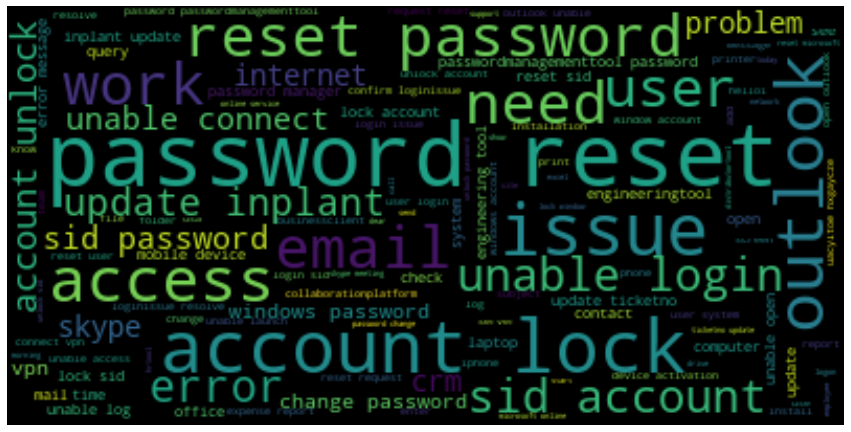

In [0]:
text = (tickets_corpus[tickets_corpus['Assignment group'] == 'GRP_0']['ticket_Desc_lemm']).to_string(index=False)
wordcloud = WordCloud().generate(text)
# plot the WordCloud image                        
plt.figure(figsize = (15, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see from the above wordcloud, most of the tickets are related to 'Password reset', 'account lock', "outlook issues', "unable to login","internet access", "email issues","skype issues" etc.

#### Wordcloud to visualize the frequent words in all tickets of all the groups.

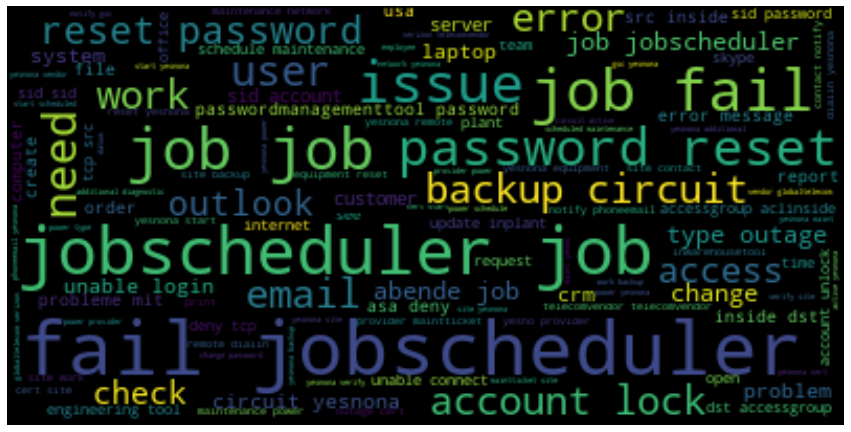

In [0]:
text = (tickets_corpus['ticket_Desc_lemm']).to_string(index=False)
wordcloud = WordCloud().generate(text)
# plot the WordCloud image                        
plt.figure(figsize = (15, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see, If we look at the ticket descriptions overall, most of the tickets are for job scheduler fail, password reset, account lock,circuit issues etc

**As we have done with our all preprocessing steps, lets move further to create the model.First lets experiment with some of the classifier algorithms and see the performance.**

## Deciding Models and Model Building

Overview of this step:

- Building a model architecture which can classify. 

- Trying different model architectures by researching state of the art for similar tasks. 

- Train the model 

- To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

**Lets experiment with different algorithms such as:**<br>
- Multinomial Naive Bayes

- K Nearest neighbor

- Support Vector Machine

- Decission Tree

- Random Forest

- LSTM

 ### Representing the raw text data as numerical data by doing vectorization
 The raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
Before creating the above classifier models, let's first vectorize our inpur data.<br>
Scikit-learn's **CountVectorizer** is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.<br><br>
**TF-IDF or Term Frequency(TF) — Inverse Dense Frequency(IDF)**  is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers. Lets use this for running our base classification models.
In text analysis with machine learning, TF-IDF algorithms help sort data into categories, as well as extract keywords. This means that simple, monotonous tasks, like tagging support tickets or rows of feedback and inputting data can be done in seconds.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tickets_corpus['ticket_Desc_lemm'], tickets_corpus['Assignment group'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [0]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6368,), (6368,), (2123,), (2123,))

#### Lets run and compare different models!

The below classifiers are run and compared:<br>
    --Multinomial Naive Bayes<br>
    --K Nearest neighbor<br>
    --Support Vector Machine<br>
    --Decission Tree<br>
    --Random Forest<br>
    --LSTM<br>



**Multinomial Naive Bayes**

Naive Bayes is a family of algorithms based on applying Bayes theorem with a strong(naive) assumption, that every feature is independent of the others, in order to predict the category of a given sample. They are probabilistic classifiers, therefore will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be output. Naive Bayes classifiers have been successfully applied to many domains, particularly NLP.<br>
<u>Advantages</u>:<br>
- It is very simple and easy to implement<br>
- It works very well with text data
- Comparatively faster considering to other algorithms<br>

<u>Disadvantages</u>:<br>
- This classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class.<br>
- Another disadvantage is due to data scarcity. For any possible value in feature space, a likelihood value must be estimated by a frequentist<br>



In [0]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_train_pred_NB = clf.predict(count_vect.transform(X_train))
y_test_pred_NB = clf.predict(count_vect.transform(X_test))
print("Multinomial NaiveBayers :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_NB) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_NB) * 100))

Multinomial NaiveBayers :
Training accuracy: 62.52%
Testing accuracy: 61.28%


**K Nearest Neighbor**<br>
KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution.This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. <br>

<u>Advantages:</u>
- The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm.<br>

<u>Disadvantages:</u>
- The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. 
- KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(X_train_tfidf, y_train)
y_train_pred_knn = clf_knn.predict(count_vect.transform(X_train))
y_test_pred_knn = clf_knn.predict(count_vect.transform(X_test))
print("K Nearest Neighbours :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_knn) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_knn) * 100))

K Nearest Neighbours :
Training accuracy: 66.83%
Testing accuracy: 64.72%


**Support Vector Machine** <br>
SVM (Support Vector Machine) classifies the data using hyperplane which acts like a decision boundary between different classes. Extreme data points from each class are called Support Vectors. SVM tries to find the best and optimal hyperplane which has maximum margin from each Support Vector. Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. <br>
The linear kernel is often recommended for text classification.<br>
<u>Advantages:</u><br>
- SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. 
- They use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.<br>

<u>Disadvantages:</u><br>
- SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. 
- It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [0]:
clf_svc = LinearSVC().fit(X_train_tfidf, y_train)
y_train_pred_svc = clf_svc.predict(count_vect.transform(X_train))
y_test_pred_svc = clf_svc.predict(count_vect.transform(X_test))
print("Support Vector Machine :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_svc) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_svc) * 100))

Support Vector Machine :
Training accuracy: 91.32%
Testing accuracy: 67.73%


**Decision Tree**

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.<br>

<u>Advantages:</u><br>
- Decision Tree is one of the easiest and popular classification algorithms to understand and interpret.<br>
- It can easily capture Non-linear patterns.<br>
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.<br>
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.<br>
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.<br>

<u>Disadvantages:</u><br>
- Sensitive to noisy data. It can overfit noisy data.<br>
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.<br>
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.<br>

In [0]:
clf_tree = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
y_train_pred_tree = clf_tree.predict(count_vect.transform(X_train))
y_test_pred_tree = clf_tree.predict(count_vect.transform(X_test))
print("Decision Tree Classifier :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_tree) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_tree) * 100))

Decision Tree Classifier :
Training accuracy: 63.63%
Testing accuracy: 51.06%


**RandomForest Classifier**

Due to its algorithmic simplicity and prominent classification performance for high dimensional data, random forest has become a promising method for text categorization. Random forest is a popular classification method which is an ensemble of a set of classification trees.<br>

<u>Advantages:</u><br>
- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.<br>
- It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.<br>
- You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.<br>

<u>Disadvantages:</u><br>
- Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.<br>
- The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.<br>

In [0]:
clf_rand = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf, y_train)
y_train_pred_rand = clf_rand.predict(count_vect.transform(X_train))
y_test_pred_rand = clf_rand.predict(count_vect.transform(X_test))
print("RandomForest Classifier:")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_rand) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_rand) * 100))

RandomForest Classifier:
Training accuracy: 83.79%
Testing accuracy: 63.87%


**Comparing Classification Models**<br>
The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.Each algorithm is given a short name, useful for summarizing results afterward.

In [0]:
# Comparing models
models = []
models.append(('MNB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', LinearSVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

MNB: 0.543182 (0.021248)
KNN: 0.335890 (0.023843)
CART: 0.582286 (0.014853)
RFC: 0.639289 (0.015696)
SVM: 0.670850 (0.022778)


Boxplot algorithm comparison

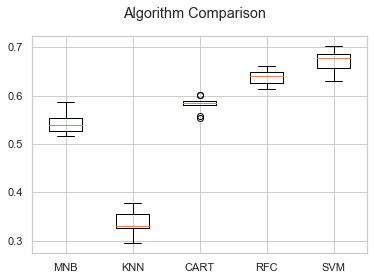

In [0]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### LSTM Model
LSTM stands for Long short-term memory.
An LSTM module (or cell) has 5 essential components which allows it to model both long-term and short-term data.LSTM is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem as LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state.LSTM in its core, preserves information from inputs that has already passed through it using the hidden state.Unidirectional LSTM only preserves information of the past because the only inputs it has seen are from the past.

<u>Advantages:</u><br>
- LSTM can handle noise, distributed representations, and continous values.
- The constant error backpropagation with memory cells results in LSTM's ability to bridge very long time lags.<br>

We are using the bidirectional LSTM neural network for the classification.Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem


#### Creating Tokens using Keras Tokenizer class.

In [0]:
texts = tickets_corpus['ticket_Desc_lemm'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
tickets_corpus['token_text_vocab'] = tokenizer.texts_to_sequences(texts)

In [26]:
vocab_words = tokenizer.word_index.items()
len(vocab_words)

17822

In [27]:
#Get the vocabulary size
num_words = len(tokenizer.word_index) +1
print (num_words)

17823


In [28]:
#To view the 10 elements from dictionary
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

take(10, vocab_words)

[('job', 1),
 ('password', 2),
 ('jobscheduler', 3),
 ('fail', 4),
 ('yesnona', 5),
 ('reset', 6),
 ('unable', 7),
 ('user', 8),
 ('account', 9),
 ('issue', 10)]

In [0]:
maxlen=300
max_features = 10000

In [0]:
X = tokenizer.texts_to_sequences(tickets_corpus['ticket_Desc_lemm'])
X = pad_sequences(X, padding='post',maxlen = maxlen)
# Converting categorical labels to numbers.
y = pd.get_dummies(tickets_corpus['Assignment group']).values

In [31]:
print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))

Number of Samples: 8491
Number of Labels:  8491


In [32]:
print("X[0] = ",X[0])
print("y[0] = ",y[0])

X[0] =  [  20   10  140    8  487   74  722    8    6 1339    8   20  642  126
  318   84    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

**Get embedding using the pre-trained model Glove**

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.<br>
The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.
Here we are using 'glove.6B.200d.txt' file which is trained on a corpus of 6 billion tokens and contains a vocabulary of 400 thousand tokens.<br>


In [0]:
glove_file = project_path + "glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
    z.extractall()

In [0]:
#Get the Word Embeddings using Embedding file
EMBEDDING_FILE = './glove.6B.200d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8",errors='ignore'):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

In [35]:
len(embeddings.values())

400000

In [36]:
#Just checking the sample embeddings for the word 'outlook' which is from our corpus
embeddings['outlook']

array([ 0.25253  ,  0.30753  ,  0.54159  ,  0.0085215,  0.36576  ,
       -0.38342  , -0.002875 , -0.65564  ,  0.55872  ,  0.54463  ,
        0.5221   ,  0.67832  , -0.044136 , -0.45919  ,  1.3775   ,
        0.54288  , -0.05421  ,  0.36371  , -0.059071 , -0.56022  ,
        0.63958  ,  1.5561   , -0.75875  , -0.24567  , -0.099208 ,
        0.32084  , -0.31637  ,  0.51132  , -0.75753  , -0.008595 ,
       -0.47135  , -0.28668  , -0.76088  ,  0.089982 ,  0.82554  ,
       -0.44267  ,  0.017712 , -0.12609  , -0.35306  ,  0.58798  ,
       -0.079643 , -0.09144  , -0.69428  ,  0.7141   ,  0.098986 ,
       -0.15905  ,  0.20222  , -0.26678  , -0.71632  ,  0.14216  ,
       -0.35488  ,  0.66125  ,  0.13997  , -0.36635  , -0.65228  ,
        0.017395 , -0.28262  , -0.62002  , -0.10768  , -0.63378  ,
        0.36728  , -0.25112  , -0.0050054, -0.12513  ,  0.071162 ,
        0.25933  ,  0.46956  ,  0.41959  ,  0.38161  ,  0.33574  ,
        1.2079   ,  1.0156   , -0.33064  ,  0.049285 ,  0.6479

It is 200 dimension word embedding for the word 'outlook'

In [0]:
#Create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

we have created the embedding vector for all the words in our vocabulary.

After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

**Split the dataset for training and testing**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6792, 300), (1699, 300), (6792, 74), (1699, 74))

**Now lets Create the LSTM model.(Bidirectional)**

Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

In [0]:
#parameters used
epochs = 20
batch_size = 60
embedding_size = 200

In [0]:
model = Sequential()
model.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                       mask_zero=True,
                        trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(74, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
### save the model so that you can use them again
output_dir = 'model_output/LSTM'

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [0]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[modelcheckpoint,EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 6792 samples, validate on 1699 samples
Epoch 1/20
6792/6792 [==============================] - 115s 17ms/sample - loss: 2.4723 - accuracy: 0.5012 - val_loss: 2.0099 - val_accuracy: 0.5438
Epoch 2/20
6792/6792 [==============================] - 108s 16ms/sample - loss: 1.8889 - accuracy: 0.5499 - val_loss: 1.8021 - val_accuracy: 0.5768
Epoch 3/20
6792/6792 [==============================] - 106s 16ms/sample - loss: 1.7132 - accuracy: 0.5727 - val_loss: 1.6883 - val_accuracy: 0.5939
Epoch 4/20
6792/6792 [==============================] - 106s 16ms/sample - loss: 1.6091 - accuracy: 0.5910 - val_loss: 1.6163 - val_accuracy: 0.6015
Epoch 5/20
6792/6792 [==============================] - 107s 16ms/sample - loss: 1.5309 - accuracy: 0.5942 - val_loss: 1.5692 - val_accuracy: 0.6098
Epoch 6/20
6792/6792 [==============================] - 107s 16ms/sample - loss: 1.4642 - accuracy: 0.6029 - val_loss: 1.5301 - val_accuracy: 0.6151
Epoch 7/20
6792/6792 [==============================] - 11

In [0]:
model.load_weights(output_dir+"/weights.14.hdf5")    # saving the weights 

In [0]:
y_pred = model.predict(X_test)

**Accuracy of the model**

In [0]:
acc_test =model.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

1699/1699 [==============================] - 5s 3ms/sample - loss: 1.4391 - accuracy: 0.6204
Test Accuracy: 0.6203649
6792/6792 [==============================] - 21s 3ms/sample - loss: 0.8996 - accuracy: 0.7192
Train Accuracy: 0.7192285


**Plot the Accuracy of the classifier**

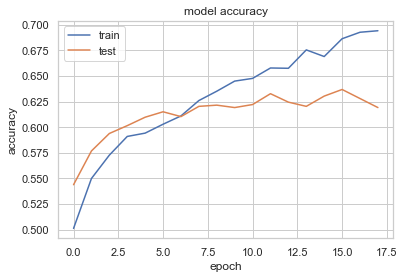

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot the Loss of the Classifier

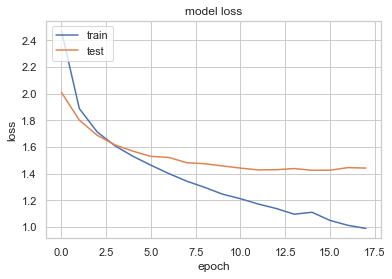

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix**<br>
A confusion matrix is a technique for summarizing the performance of a classification algorithm.Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.The confusion matrix shows the ways in which your classification model is confused when it makes predictions.It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

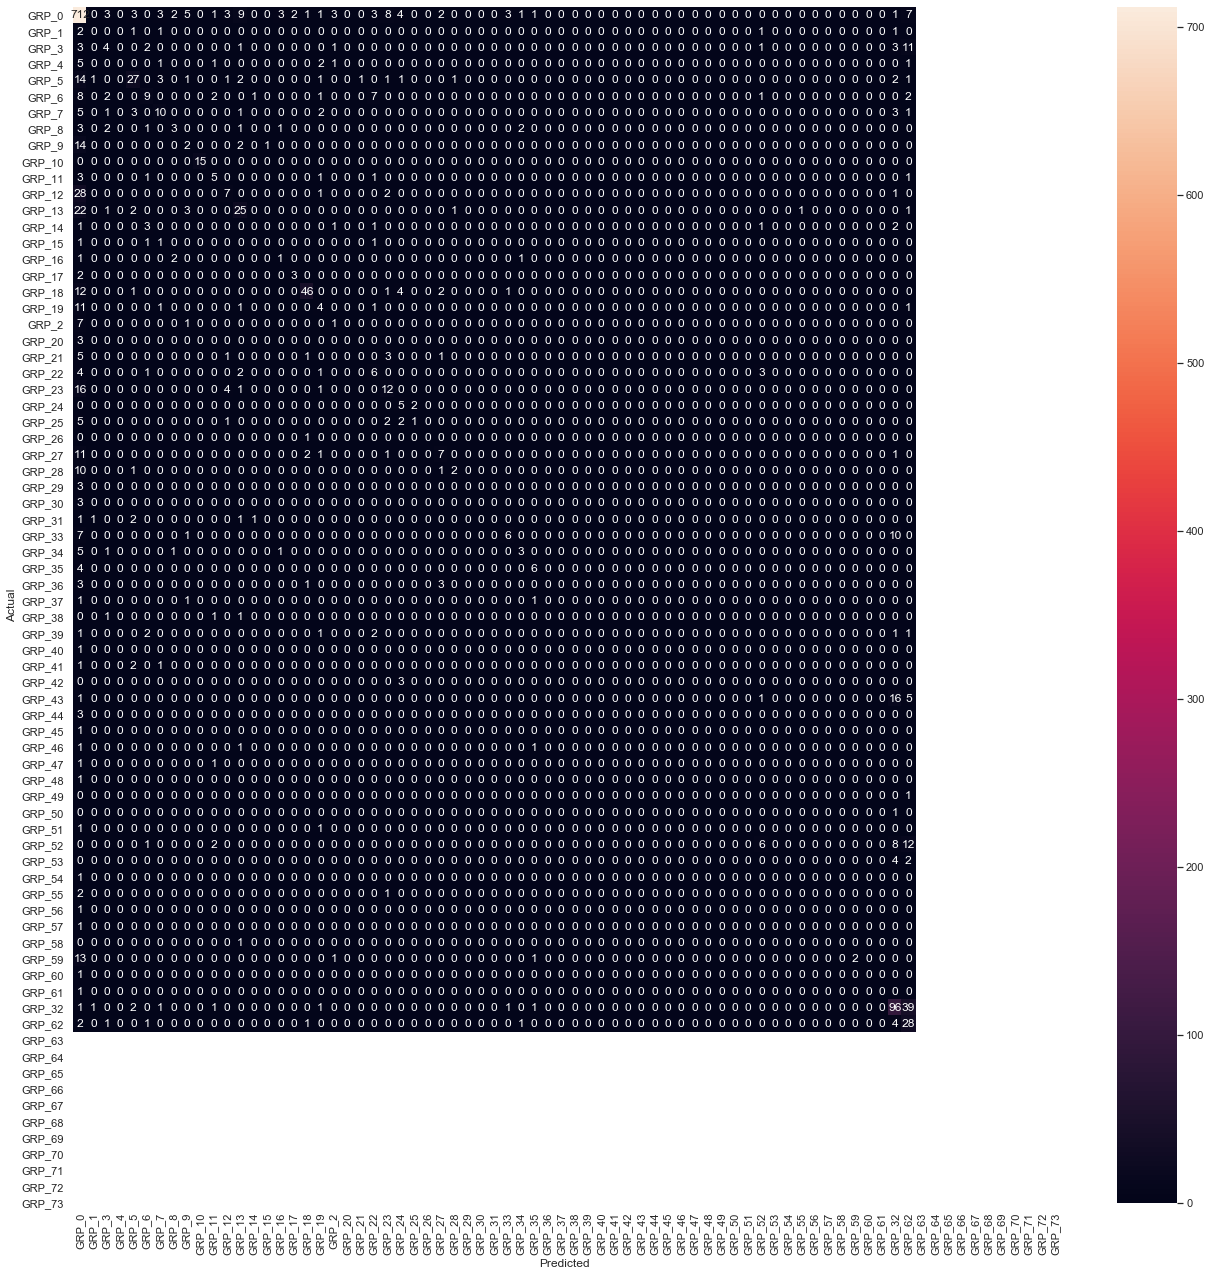

In [0]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
#fig, ax = plt.subplots(figsize=(20,20))
plt.figure(figsize=(22,22))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=tickets_corpus['Assignment group'].unique(), yticklabels=tickets_corpus['Assignment group'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


Many Assignment groups are not present in the test data. The diagonal element value for GRP_0 is high

**Classification Reports**

In [0]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81       781
           1       0.00      0.00      0.00         6
           2       0.25      0.15      0.19        26
           3       0.00      0.00      0.00        11
           4       0.61      0.47      0.53        57
           5       0.41      0.27      0.33        33
           6       0.45      0.38      0.42        26
           7       0.38      0.23      0.29        13
           8       0.14      0.11      0.12        19
           9       1.00      1.00      1.00        15
          10       0.36      0.42      0.38        12
          11       0.41      0.18      0.25        39
          12       0.51      0.45      0.48        56
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         4
          15       0.17      0.20      0.18         5
          16       0.60      0.60      0.60         5
   

/Users/rishinarang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Evaluation comparison of the above classifier models:**

Out of all the models we've tried, Support Vector Machine and RandomForestClassifier are performing better than all others. But these models are highly overfitted and one of the obvious reason was the dataset was highly imbalanced.

The Accuracy of the Models:<br>
<pre>

| Algorithm               | Train_Accuracy   | Test_accuracy  |
|-------------------------|------------------|----------------|
| Multinomail NB          |  62.52           |  61.28         | 
--------------------------|------------------|----------------|
| K Nearest Neighbours    |  66.87           |  64.67         | 
--------------------------|------------------|----------------|
| Support Vector Machine  |  91.32           |  67.73         | 
--------------------------|------------------|----------------|
| Decision Tree Classifier|  63.27           |  50.82         | 
--------------------------|------------------|----------------|
| RandomForest Classifier |  84.22           |  64.48         | 
--------------------------|------------------|----------------|
| Bidirectional LSTM      |  75.10           |  63.39         | 
--------------------------|------------------|----------------|
</pre>

LSTM is efficient of dealing with textual data. Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on classification problems.Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.<br>
We can try improving the performance of the above LSTM model by tuning the hyperparameters,and checking other possible refinements.

### Testing the BLSTM Model for a new ticket!
Let's test the model for a new incident ticket which is not present in our train and test datasets and find out how the model predict the assignment group for same. 

In [0]:
ticket = ['caller confirmed that he was able to login, checked the user name in ad and reset the password']
#vectorizing the tweet by the pre-fitted tokenizer instance
ticket = tokenizer.texts_to_sequences(ticket)
#padding the tweet to have exactly the same shape as `embedding_2` input
ticket = pad_sequences(ticket, maxlen=maxlen, value=0.0, padding='post')
print("Ticket :",ticket)
output = model.predict(ticket)
print("Output:",output)

Ticket : [[  843 10262    20  3450     8   560     6     2     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0    

In [0]:
def decode(datum):
    return np.argmax(datum)

In [0]:
decoded_Y = []
print("****************************************")
for i in range(output.shape[0]):
    datum = output[i]
    #print('index: %d' % i)
    #print('encoded datum: %s' % datum)
    decoded_datum = decode(output[i])
    #print('decoded datum: %s' % decoded_datum)
    decoded_Y.append(tickets_corpus['Assignment group'][decoded_datum])
    
print("Decoded_y:" , decoded_Y)

****************************************
Decoded_y: ['GRP_0']


The model has predicted the incident ticket assignment group as GRP_0.

### Saving the data to a CSV file.

In [0]:
#saving the data to a CSV file.
file_name='preprocessed_input_data.csv'
tickets_corpus.to_csv(file_name,encoding='utf-8',index=False)

#To delimit by a tab you can use the 'sep' argument
#When you are storing a DataFrame object into a csv file using the to_csv method, 
#no need to store the preceding indices of each row of the DataFrame object so passing a False boolean value to index parameter.

## Milestone 3 

### Tuning of LSTM Model!

**1. LSTM Merge Mode**

The Bidirectional wrapper layer also allows to specify the merge mode, that is how the forward and backward outputs should be combined before being passed on to the next layer.

The options are:<br/>
'sum': The outputs are added together.<br/>
'mul': The outputs are multiplied together.<br/>
'concat': The outputs are concatenated together (the default), providing double the number of outputs to the next layer.<br/>
'ave': The average of the outputs is taken.<br/>

'concat'is the default merge mode. Merge mode 'mul' and 'ave' didn't show any improvements in F1 score. However merge mode of 'sum' showed improved F1 score. 

Look the following results with 17 epochs.

**Fit an LSTM model with merge_mode="sum"**

In [0]:
model = Sequential()
model.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                       mask_zero=True,
                        trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(74, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_mode_sum = model.fit(X_train, 
                    y_train, 
                    epochs=17, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 6792 samples, validate on 1699 samples
Epoch 1/17
6792/6792 [==============================] - 110s 16ms/sample - loss: 2.4467 - accuracy: 0.5041 - val_loss: 1.9681 - val_accuracy: 0.5509
Epoch 2/17
6792/6792 [==============================] - 103s 15ms/sample - loss: 1.8520 - accuracy: 0.5542 - val_loss: 1.7610 - val_accuracy: 0.5756
Epoch 3/17
6792/6792 [==============================] - 104s 15ms/sample - loss: 1.7062 - accuracy: 0.5713 - val_loss: 1.6606 - val_accuracy: 0.5992
Epoch 4/17
6792/6792 [==============================] - 104s 15ms/sample - loss: 1.5954 - accuracy: 0.5901 - val_loss: 1.5806 - val_accuracy: 0.6015
Epoch 5/17
6792/6792 [==============================] - 104s 15ms/sample - loss: 1.5254 - accuracy: 0.5964 - val_loss: 1.5485 - val_accuracy: 0.6162
Epoch 6/17
6792/6792 [==============================] - 104s 15ms/sample - loss: 1.4572 - accuracy: 0.6084 - val_loss: 1.5317 - val_accuracy: 0.6104
Epoch 7/17
6792/6792 [==============================] - 10

##### Plot the Accuracy of the classifier

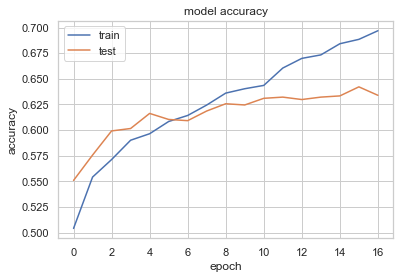

In [0]:
plt.plot(history_mode_sum.history['accuracy'])
plt.plot(history_mode_sum.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot the Loss of the Classifier

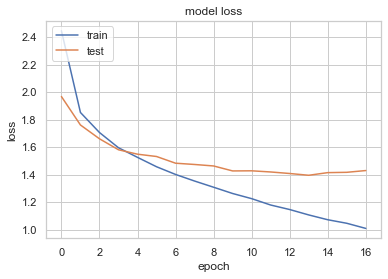

In [0]:
plt.plot(history_mode_sum.history['loss'])
plt.plot(history_mode_sum.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred_mode_sum = model.predict(X_test)

###### Accuracy of the model when merge mode is sum

In [0]:
acc_test =model.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

1699/1699 [==============================] - 5s 3ms/sample - loss: 1.4294 - accuracy: 0.6339
Test Accuracy: 0.6339023
6792/6792 [==============================] - 20s 3ms/sample - loss: 0.7949 - accuracy: 0.7571
Train Accuracy: 0.75706714


###### Classification Reports  

In [0]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred_mode_sum.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       781
           1       0.00      0.00      0.00         6
           2       0.40      0.15      0.22        26
           3       0.50      0.18      0.27        11
           4       0.54      0.58      0.56        57
           5       0.29      0.42      0.34        33
           6       0.42      0.50      0.46        26
           7       0.60      0.23      0.33        13
           8       0.50      0.16      0.24        19
           9       1.00      1.00      1.00        15
          10       0.36      0.33      0.35        12
          11       0.27      0.15      0.20        39
          12       0.53      0.32      0.40        56
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         4
          15       0.20      0.20      0.20         5
          16       0.50      0.60      0.55         5
   

#### Observations (When compared to the original model created in Milestone 2)
With LSTM merge mode SUM, Test accuracy has improved to 63%, however training accuracy improved to 75%. The average F1 Score of the model is 0.60. We can go ahead with  SUM. 


 **2.Number of LSTM Cells**

We cannot know the best number of memory cells for a given LSTM architecture. We must test a suite of different memory cells in LSTM hidden layers to see what works best. Let's take 3 different numbers of LSTM cells, 50, 100 and 200.

In [0]:
epochs_lstm_cells = 2
params = [50, 100, 200]
n_repeats = 2

In [0]:
# fit an LSTM model
def fit_model(n_cells):
    # define model
    model_lstm_cells = Sequential()
    model_lstm_cells.add(Embedding(input_dim=num_words, 
                            output_dim=embedding_size, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, 
                            trainable=False))
    model_lstm_cells.add(SpatialDropout1D(0.2))
    model_lstm_cells.add(Bidirectional(LSTM(n_cells, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
    model_lstm_cells.add(Dense(100, activation='relu'))
    model_lstm_cells.add(Dropout(0.1))
    model_lstm_cells.add(Dense(74, activation='softmax'))
    # compile model
    model_lstm_cells.compile(loss='mse', optimizer='adam')
    # fit model
    #X_train, X_test, y_train, y_test
    model_lstm_cells.fit(X_train, 
                        y_train, 
                        epochs=epochs_lstm_cells, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    # evaluate model
    loss = model_lstm_cells.evaluate(X_test, y_test, verbose=0)
    return loss

Train on 6792 samples, validate on 1699 samples
Epoch 1/2
6792/6792 [==============================] - 89s 13ms/sample - loss: 0.0102 - val_loss: 0.0089
Epoch 2/2
6792/6792 [==============================] - 82s 12ms/sample - loss: 0.0086 - val_loss: 0.0082
>1/2 param=50.000000, loss=0.008246
Train on 6792 samples, validate on 1699 samples
Epoch 1/2
6792/6792 [==============================] - 90s 13ms/sample - loss: 0.0103 - val_loss: 0.0089
Epoch 2/2
6792/6792 [==============================] - 82s 12ms/sample - loss: 0.0085 - val_loss: 0.0082
>2/2 param=50.000000, loss=0.008216
Train on 6792 samples, validate on 1699 samples
Epoch 1/2
6792/6792 [==============================] - 108s 16ms/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 2/2
6792/6792 [==============================] - 103s 15ms/sample - loss: 0.0084 - val_loss: 0.0081
>1/2 param=100.000000, loss=0.008120
Train on 6792 samples, validate on 1699 samples
Epoch 1/2
6792/6792 [==============================] - 110s 16ms/sa

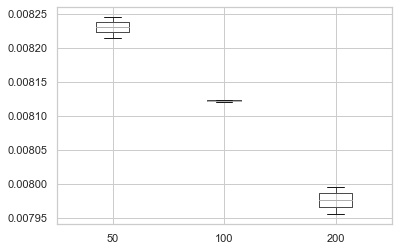

In [0]:
# grid search parameter values
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
# summary statistics of results
print(scores.describe())
# box and whisker plot of results
scores.boxplot()
pyplot.show()

#### Observations (When compared to the original model created in Milestone 2)

By Increasing the number of LSTM cells from 100 to 200 we can see the reduction in overall loss.

**3. Regularization**

LSTMs can quickly converge and even overfit on some sequence prediction problems. To counter this, regularization methods can be used. LSTMs supports regularization such as weight regularization that imposes pressure to decrease the size of network weights. Again, these can be set on the LSTM layer with the arguments.

In [0]:
model_regularized = Sequential()
model_regularized.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
                        trainable=False))
model_regularized.add(SpatialDropout1D(0.2))
model_regularized.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model_regularized.add(Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.01)))
model_regularized.add(Dropout(0.1))
model_regularized.add(Dense(74, activation='softmax'))

Using TensorFlow backend.


In [0]:
model_regularized.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history_regularized = model_regularized.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 6792 samples, validate on 1699 samples
Epoch 1/20
6792/6792 [==============================] - 114s 17ms/sample - loss: 7.4918 - accuracy: 0.4822 - val_loss: 4.0292 - val_accuracy: 0.5274
Epoch 2/20
6792/6792 [==============================] - 110s 16ms/sample - loss: 2.9540 - accuracy: 0.5308 - val_loss: 2.5158 - val_accuracy: 0.5291
Epoch 3/20
6792/6792 [==============================] - 108s 16ms/sample - loss: 2.3976 - accuracy: 0.5392 - val_loss: 2.3297 - val_accuracy: 0.5450
Epoch 4/20
6792/6792 [==============================] - 107s 16ms/sample - loss: 2.2666 - accuracy: 0.5512 - val_loss: 2.2520 - val_accuracy: 0.5568
Epoch 5/20
6792/6792 [==============================] - 106s 16ms/sample - loss: 2.1797 - accuracy: 0.5536 - val_loss: 2.1739 - val_accuracy: 0.5603
Epoch 6/20
6792/6792 [==============================] - 107s 16ms/sample - loss: 2.1219 - accuracy: 0.5576 - val_loss: 2.1361 - val_accuracy: 0.5644
Epoch 7/20
6792/6792 [==============================] - 10

##### Plot the Accuracy of the classifier

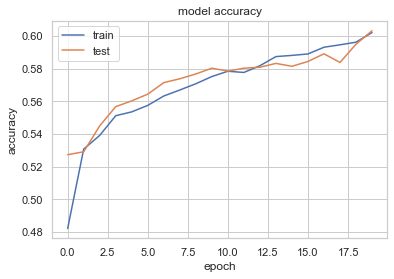

In [0]:
plt.plot(history_regularized.history['accuracy'])
plt.plot(history_regularized.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Plot the Loss of the Classifier

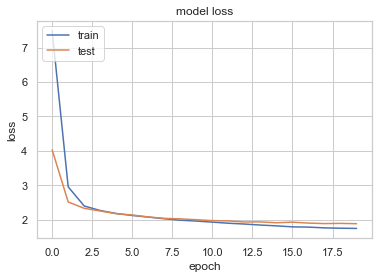

In [0]:
plt.plot(history_regularized.history['loss'])
plt.plot(history_regularized.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred_regularized = model_regularized.predict(X_test)

In [0]:
acc_test_regularized =model_regularized.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test_regularized[1])

acc_train_regularized =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train_regularized[1])

1699/1699 [==============================] - 5s 3ms/sample - loss: 1.8831 - accuracy: 0.6033
Test Accuracy: 0.60329604
6792/6792 [==============================] - 20s 3ms/sample - loss: 0.7949 - accuracy: 0.7571
Train Accuracy: 0.75706714


In [0]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred_regularized.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80       781
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        11
           4       0.37      0.65      0.47        57
           5       0.19      0.61      0.29        33
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        19
           9       1.00      1.00      1.00        15
          10       0.00      0.00      0.00        12
          11       0.80      0.10      0.18        39
          12       0.19      0.29      0.23        56
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
   

#### Observations:
By adding regualarization on Dense layer using kernel_regularizer and activity_regularizer, no improvement is seen on train and validation data. F1 score dropped from 0.60 to 0.50 may be because of less data related to other categories.

**4. Weight Initialization**

The Keras LSTM layer uses the glorot uniform weight initialization by default. This weight initialization works well in general.

Lets try normal type weight initialization with LSTMs and see if we can get better results.

In [0]:
initializer = tf.keras.initializers.GlorotNormal()

In [0]:
model_normalized = Sequential()
model_normalized.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                       mask_zero=True,
                        trainable=False))
model_normalized.add(SpatialDropout1D(0.2))
model_normalized.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model_normalized.add(Dense(100, activation='relu', kernel_initializer=initializer))
model_normalized.add(Dropout(0.1))
model_normalized.add(Dense(74, activation='softmax'))

In [0]:
model_normalized.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
epochs_initializer_test = 10

In [0]:
history_normalized = model_normalized.fit(X_train, 
                    y_train, 
                    epochs=epochs_initializer_test, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 6792 samples, validate on 1699 samples
Epoch 1/10
6792/6792 [==============================] - 124s 18ms/sample - loss: 2.4786 - accuracy: 0.4957 - val_loss: 2.0100 - val_accuracy: 0.5444
Epoch 2/10
6792/6792 [==============================] - 112s 17ms/sample - loss: 1.8679 - accuracy: 0.5504 - val_loss: 1.7768 - val_accuracy: 0.5721
Epoch 3/10
6792/6792 [==============================] - 110s 16ms/sample - loss: 1.6966 - accuracy: 0.5748 - val_loss: 1.6516 - val_accuracy: 0.6045
Epoch 4/10
6792/6792 [==============================] - 110s 16ms/sample - loss: 1.5986 - accuracy: 0.5839 - val_loss: 1.6176 - val_accuracy: 0.6057
Epoch 5/10
6792/6792 [==============================] - 109s 16ms/sample - loss: 1.5358 - accuracy: 0.5938 - val_loss: 1.5740 - val_accuracy: 0.6092
Epoch 6/10
6792/6792 [==============================] - 112s 17ms/sample - loss: 1.4639 - accuracy: 0.6023 - val_loss: 1.5228 - val_accuracy: 0.6151
Epoch 7/10
6792/6792 [==============================] - 11

##### Plot the Accuracy of the classifier

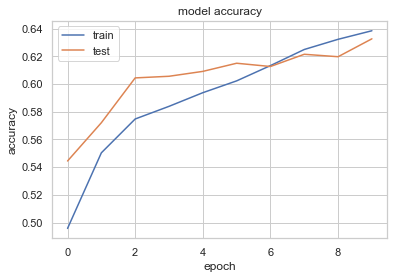

In [0]:
plt.plot(history_normalized.history['accuracy'])
plt.plot(history_normalized.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot the Loss of the Classifier

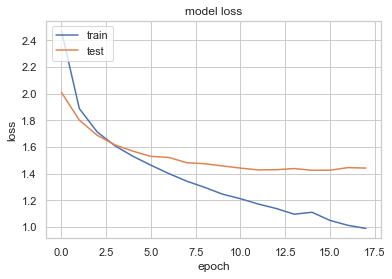

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred_normalized = model_normalized.predict(X_test)

In [0]:
acc_test_normalized = model_normalized.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test_normalized[1])

acc_train_normalized = model_normalized.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train_normalized[1])

1699/1699 [==============================] - 6s 3ms/sample - loss: 1.4264 - accuracy: 0.6327
Test Accuracy: 0.6327251
6792/6792 [==============================] - 22s 3ms/sample - loss: 1.0782 - accuracy: 0.6832
Train Accuracy: 0.68315667


In [0]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred_normalized.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       781
           1       0.00      0.00      0.00         6
           2       0.36      0.15      0.22        26
           3       0.00      0.00      0.00        11
           4       0.56      0.40      0.47        57
           5       0.31      0.45      0.37        33
           6       0.44      0.31      0.36        26
           7       0.50      0.08      0.13        13
           8       0.00      0.00      0.00        19
           9       0.83      1.00      0.91        15
          10       0.36      0.42      0.38        12
          11       0.40      0.05      0.09        39
          12       0.45      0.48      0.47        56
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         4
          15       0.20      0.20      0.20         5
          16       0.75      0.60      0.67         5
   

/Users/rishinarang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Observations :
Comparing with the Bidirectional LSTM model with merge_mode="sum", after adding the kernel_initializer=GlorotNormal() in the Dense layer, the test accuracy is almost same as 63%. Training accuracy reduced from 75% to 68%. F1 score is 0.57. We can prefer to use GlorotNormal.

**5. Pipeline**

Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated. Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

In [0]:
# this calculates a vector of term frequencies
vect = CountVectorizer()
# this normalizes each term frequency
tfidf = TfidfTransformer()
#linear SVM classifier
clf = LinearSVC()

In [0]:
from sklearn.pipeline import Pipeline
nlp_pipeline = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
])

In [0]:
#Splitting the train and test data
X_train_pip, X_test_pip, y_train_pip, y_test_pip = train_test_split(tickets_corpus['ticket_Desc_lemm'], tickets_corpus['Assignment group'], random_state = 0)
X_train_pip.shape,y_train_pip.shape,X_test_pip.shape,y_test_pip.shape

((6368,), (6368,), (2123,), (2123,))

In [0]:
#fit trian data to the pipeline
nlp_pipeline.fit(X_train_pip,y_train_pip)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [0]:
# predict test instances
y_preds = nlp_pipeline.predict(X_test_pip)

# calculate f1
mean_f1 = f1_score(y_test_pip, y_preds, average='micro')
print('Mean f1 Score ---',mean_f1)

Mean f1 Score --- 0.6947715496938295


In [0]:
print(classification_report(y_test_pip, y_preds))

              precision    recall  f1-score   support

       GRP_0       0.75      0.94      0.83      1019
       GRP_1       0.33      0.20      0.25         5
      GRP_10       0.57      0.44      0.50        27
      GRP_11       1.00      0.14      0.25         7
      GRP_12       0.60      0.61      0.61        67
      GRP_13       0.67      0.61      0.64        36
      GRP_14       0.61      0.37      0.46        30
      GRP_15       0.57      0.25      0.35        16
      GRP_16       0.23      0.14      0.18        21
      GRP_17       0.85      0.89      0.87        19
      GRP_18       0.48      0.55      0.51        20
      GRP_19       0.33      0.17      0.22        59
       GRP_2       0.55      0.41      0.47        51
      GRP_20       0.25      0.09      0.13        11
      GRP_21       0.00      0.00      0.00         7
      GRP_22       0.50      0.33      0.40         3
      GRP_23       0.75      0.43      0.55         7
      GRP_24       0.87    

/Users/rishinarang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rishinarang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



#### Observations:
Pipeline and Feature Union as such doesnot improve performance of the models. Its adds more value by combining different rules and models, we can define out own transformers that will improve the performance. Here we have done basic pipeline model.

Pipelines help in optimizing entire workflow, preventing data leakage and code simplicity.

### BERT : State of the Art NLP Model
BERT (Bidirectional Encoder Representations from Transformers).<br>
BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling.This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. <br>
Here we used BERT_MODEL = 'uncased_L-12_H-768_A-12'

In [24]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [25]:
import tensorflow_hub as hub
print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)
print(tf.__version__)

tensorflow version :  1.15.0
tensorflow_hub version :  0.8.0
1.15.0


In [0]:
!pip uninstall tensorflow==2.2.0

In [0]:
!pip install tensorflow==1.15.0

In [27]:
%cd /content/drive/My Drive/BERT/

/content/drive/My Drive/BERT


In [0]:
#Install necessary pretrained models files related to BERT.
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py 

In [29]:
import modeling
import optimization
import run_classifier
import tokenization

In [0]:
#Establishing path in gdrive for BERT model zip extraction
folder = '/content/drive/My Drive/BERT/'
with zipfile.ZipFile("uncased_L-12_H-768_A-12.zip","r") as zip_ref:
    zip_ref.extractall(folder)

Create Folder for storing Model Output. We have decided to use the "bert_uncased_L-12_H-768_A-12" model.
We will be using the vocab.txt file in the model to map the words in the dataset to indexes. Also the loaded BERT model is trained on uncased/lowercase data and hence the data we feed to train the model should also be of lowercase which is already performed in milestone 1 preprocessing work.

In [31]:
BERT_MODEL = 'uncased_L-12_H-768_A-12'
BERT_PRETRAINED_DIR = '/content/drive/My Drive/BERT/uncased_L-12_H-768_A-12'
OUTPUT_DIR = f'{folder}/outputs'
print(f'>> Model output directory: {OUTPUT_DIR}')
print(f'>>  BERT pretrained directory: {BERT_PRETRAINED_DIR}')

>> Model output directory: /content/drive/My Drive/BERT//outputs
>>  BERT pretrained directory: /content/drive/My Drive/BERT/uncased_L-12_H-768_A-12


In [0]:
X=tickets_corpus["ticket_Desc_lemm"].values
le = preprocessing.LabelEncoder()
le.fit(tickets_corpus['Assignment group'].values)
y = le.transform(tickets_corpus['Assignment group'].values)

#Split the dataframe into train and test in 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
#change path to Folder where model is located
%cd /content/drive/My Drive/BERT/uncased_L-12_H-768_A-12

/content/drive/My Drive/BERT/uncased_L-12_H-768_A-12



Create definition for importing dataset as per BERT input requirements. Also define necessary hyperparamters for model. We will try different Batch size, learning rate and maximum sequence lengths to achieve best possible accuracy and F1 score.

In [34]:
def create_examples(lines, set_type, labels=None):
#Generate data for the BERT model
    guid = f'{set_type}'
    examples = []
    if guid == 'train':
        for line, label in zip(lines, labels):
            text_a = line
            label = str(label)
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    else:
        for line in lines:
            text_a = line
            label = '0'
            examples.append(
              run_classifier.InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
    return examples

# Model Hyper Parameters
TRAIN_BATCH_SIZE = 16
EVAL_BATCH_SIZE = 8
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 8.0
WARMUP_PROPORTION = 0.1
MAX_SEQ_LENGTH = 128
# Model configs
SAVE_CHECKPOINTS_STEPS = 1000 #if you wish to finetune a model on a larger dataset, use larger interval
# each checpoint weights about 1,5gb
ITERATIONS_PER_LOOP = 1000
NUM_TPU_CORES = 8
VOCAB_FILE = os.path.join(BERT_PRETRAINED_DIR, 'vocab.txt')
CONFIG_FILE = os.path.join(BERT_PRETRAINED_DIR, 'bert_config.json')
INIT_CHECKPOINT = os.path.join(BERT_PRETRAINED_DIR, 'bert_model.ckpt')
DO_LOWER_CASE = BERT_MODEL.startswith('uncased')

label_list = [str(num) for num in range(74)]
tokenizer = tokenization.FullTokenizer(vocab_file=VOCAB_FILE, do_lower_case=DO_LOWER_CASE)
train_examples = create_examples(X_train, 'train', labels=y_train)

tpu_cluster_resolver = None #Since training will happen on GPU, we won't need a cluster resolver
#TPUEstimator also supports training on CPU and GPU. You don't need to define a separate tf.estimator.Estimator.
run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=ITERATIONS_PER_LOOP,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))

num_train_steps = int(
    len(train_examples) / TRAIN_BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

model_fn = run_classifier.model_fn_builder(
    bert_config=modeling.BertConfig.from_json_file(CONFIG_FILE),
    num_labels=len(label_list),
    init_checkpoint=INIT_CHECKPOINT,
    learning_rate=LEARNING_RATE,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available  
    use_one_hot_embeddings=True)

estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=False, #If False training will fall on CPU or GPU, depending on what is available 
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/BERT//outputs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 1000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 72

Convert our train and validation features to InputFeatures that BERT understands.Create a funciton to train the model. 

In [0]:
print('Please wait...')
train_features = run_classifier.convert_examples_to_features(
    train_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
print('>> Started training at {} '.format(datetime.datetime.now()))
print('  Num examples = {}'.format(len(train_examples)))
print('  Batch size = {}'.format(TRAIN_BATCH_SIZE))
tf.logging.info("  Num steps = %d", num_train_steps)
train_input_fn = run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=True)
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print('>> Finished training at {}'.format(datetime.datetime.now()))

In [0]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)

  def input_fn(params):
    """The actual input function."""
    print(params)
    batch_size = 500

    num_examples = len(features)

    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

Creating prediction function to run on test dataset

In [37]:
predict_examples = create_examples(X_test, 'test')

predict_features = run_classifier.convert_examples_to_features(
    predict_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

predict_input_fn = input_fn_builder(
    features=predict_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

result = estimator.predict(input_fn=predict_input_fn)

INFO:tensorflow:Writing example 0 of 1699
INFO:tensorflow:*** Example ***
INFO:tensorflow:guid: test
INFO:tensorflow:tokens: [CLS] need access user collaboration ##pl ##at ##form need access user collaboration ##pl ##at ##forms ##um ##mar ##y ##co ##w ##q ##y ##j ##z ##m f ##z ##s ##x ##ga ##pt inform ste ##fy ##ty sm ##hd ##y ##ht ##is collaboration ##pl ##at ##form business permanently del ##ete day need access collaboration ##pl ##at ##form see need [SEP]
INFO:tensorflow:input_ids: 101 2342 3229 5310 5792 24759 4017 14192 2342 3229 5310 5792 24759 4017 22694 2819 7849 2100 3597 2860 4160 2100 3501 2480 2213 1042 2480 2015 2595 3654 13876 12367 26261 12031 3723 15488 14945 2100 11039 2483 5792 24759 4017 14192 2449 8642 3972 12870 2154 2342 3229 5792 24759 4017 14192 2156 2342 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
preds = []
for prediction in result:
      preds.append(np.argmax(prediction['probabilities']))

In [39]:
print("Accuracy of BERT is:",accuracy_score(y_test,preds))

Accuracy of BERT is: 0.6727486756915833


In [40]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       795
           1       0.00      0.00      0.00         6
           2       0.57      0.48      0.52        25
           3       0.00      0.00      0.00         4
           4       0.46      0.77      0.57        48
           5       0.34      0.56      0.42        27
           6       0.38      0.37      0.38        27
           7       1.00      0.10      0.18        10
           8       0.60      0.53      0.56        17
           9       0.95      1.00      0.97        19
          10       0.29      0.27      0.28        15
          11       0.28      0.30      0.29        43
          12       0.31      0.49      0.38        39
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         6
          15       0.10      1.00      0.18         1
          16       0.00      0.00      0.00         3
          17       0.82    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [50]:
print("F1-Score of the model:")
f1_score(y_test, preds, average='weighted')

F1-Score of the model:


0.6389044783575125

BERT model has shown better performance than the bidirectional LSTM model so far.

## Testing a different approch on the tickets data!

We have many assignment groups those do not have enough samples to train the classifier model. And also around 48% of tickets data belongs to one assignment group GRP_0.Since our data is highly unbalanced and it is biased towards the GRP_0, we are experimenting the below approches in order to make the data more balanced.<br>

 - Lets combine the minority assignment groups into a single group say 'others'
 - Lets downsample the GRP_0 in the training set 

Since the data is highly biased towards GRP_0, model performance on other assignment groups are comparatively poor. So in order to make the model to train on the other assignment groups as well, we are downsampling the GRP_0 tickets. <br>
But in the actual business data, we have more number of GRP_0 tickets and we dont want to manipulate the data to impact the actual business scenario.
So  we are just downsampling the GRP_0 only on the train data, so that our model can train to classify the other assignment groups as well and also keeping the test data as same as from the business process.


#### Clubbing the minority groups which have less than 30 samples (tickets) per assignment groups

In [41]:
#Lets Select all ticket Assignment groups which have only one ticket
rare_grps= tickets_corpus[tickets_corpus.groupby("Assignment group")["Assignment group"].transform('size') <30]['Assignment group'].unique()
rare_grps

array(['GRP_21', 'GRP_23', 'GRP_27', 'GRP_35', 'GRP_36', 'GRP_37',
       'GRP_38', 'GRP_39', 'GRP_43', 'GRP_44', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53',
       'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59',
       'GRP_60', 'GRP_61', 'GRP_32', 'GRP_62', 'GRP_63', 'GRP_64',
       'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_70',
       'GRP_71', 'GRP_72', 'GRP_73'], dtype=object)

In [42]:
#Lets check the total number of rare assignment groups
rare_grps.size

39

In [43]:
#Create a different dataframe for the tickets belongs to the rare groups
rare_df = tickets_corpus[tickets_corpus['Assignment group'].isin(rare_grps)]
rare_df.shape

(357, 11)

In [44]:
# Rename the Assignment group attribute
rare_df['Assignment group'] = 'others'
#Lets check whether the group name has changed to 'others'
print(rare_df['Assignment group'].head(3))

197    others
206    others
247    others
Name: Assignment group, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#creating a dataframe excluding the rare groups from our original data
grp_exl_df = tickets_corpus[~tickets_corpus['Assignment group'].isin(rare_grps)]
grp_exl_df.shape

(8134, 11)

In [46]:
#Now lets add the rare groups df (having one assignment group as 'others') to the excluded dataframe 
ticket_df = pd.concat([grp_exl_df,rare_df]).reset_index(drop=True)
ticket_df.shape

(8491, 11)

Now we have clubbed the minority assignment groups into a single group. Now lets downsample the GRP_0 

### UnderSampling GRP_0

-  Use only train dataset for undersampling GRP_0. We are keepting test data as it is , in this case.
-  Build a Topic Model with top 3  different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.
-  Run LDA for each record of GRP_0 to find the associated topic based on the LDA score. As the topic modeling has been trained to accomodate only top 3 or 4 topics for entire GRP_0 data, any record scoring less than 50%, we categorize them into next (other) topic and such tickets are not the candidates for resampling.
- use RandomUnderSampler

In [47]:
#Lets split the data for training and testing for the undersampling from the ticket_df
X=ticket_df['ticket_Desc_lemm'].values
y2=ticket_df['Assignment group'].values
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6792,), (1699,), (6792,), (1699,))

In [48]:
#Take only the training datasets(X_train and y_train) and covert it into a dataframe for futher processing
X_col_names=["ticket_Desc_lemm"]
y_col_names=["Assignment group"]
df_X = pd.DataFrame(X_train,columns = X_col_names)
df_Y = pd.DataFrame(y_train,columns = y_col_names)
df_train = pd.concat([df_X, df_Y], axis=1)
print("Shape of df_train:",df_train.shape)
df_train.head(5)

Shape of df_train: (6792, 2)


ticket_Desc_lemm Assignment group
0  error login sid system error login sid systemverifie user detailsemployee manager nameuser passwordmanagementtool pwd managerunlocke reset todaypaycaller confirm loginissue resolve            GRP_0
1                                                                                                           pobleme mit wecombi jionmpsf wnkpzcmv pobleme mit wecombi jionmpsf wnkpzcmv           GRP_24
2    standby laptop mcae day oct dear saravthsyanawe need standby laptop hall day mcae courseshould microsoft office adobe reader vlc showplease ready today collect morning deptthanke           GRP_19
3                                                                                                               unable print request printer driver unable print request printer driver            GRP_0
4                                                                                                                     enable access code cvn view draw enable access code cvn view draw            GRP_0

In [49]:
# filter the records assigned to only GRP_0
grp0_tickets = df_train[df_train['Assignment group'] == 'GRP_0']
grp0_tickets["Assignment group"].head(5)

0    GRP_0
3    GRP_0
4    GRP_0
7    GRP_0
8    GRP_0
Name: Assignment group, dtype: object

#### Latent Dirichlet Allocation(LDA)
It is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package to extract the hidden topics from large volumes of text.It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.
Let's first use gensim to implement LDA and we are going to apply LDA to GRP_0 and split them into different topics.<br>
The main inputs needed for doing LDA is:
 - corpus
 - dictionary of words with term frequency 

In [0]:
# Vectorizations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Tokenize the ticket_Desc attribute of GRP_0 records
df_words = list(sent_to_words(grp0_tickets['ticket_Desc_lemm'].values.tolist()))
df_words = [[word for word in simple_preprocess(str(doc)) if word not in STOPWORDS] for doc in df_words]

# Build the bigram
bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
df_words_bigrams = [bigram_mod[doc] for doc in df_words]

# Create Dictionary
id2word = corpora.Dictionary(df_words_bigrams)
# Term Document Frequency
#using doc2bow,we create a dictionary reporting how many words and how many times those words appear.
corpus = [id2word.doc2bow(text) for text in df_words_bigrams]

In [52]:
#Lets build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print()

Topic: 1 
Words: 0.116*"password" + 0.073*"reset" + 0.059*"user" + 0.051*"sid" + 0.047*"login" + 0.027*"account" + 0.021*"change" + 0.021*"unlock" + 0.015*"request" + 0.011*"windows"

Topic: 2 
Words: 0.056*"lock" + 0.047*"update" + 0.043*"account" + 0.018*"crm" + 0.017*"inplant" + 0.011*"ticketno" + 0.010*"engineeringtool" + 0.010*"window" + 0.009*"iphone" + 0.008*"device"

Topic: 3 
Words: 0.051*"unable" + 0.030*"outlook" + 0.025*"issue" + 0.021*"work" + 0.019*"access" + 0.016*"connect" + 0.015*"error" + 0.013*"log" + 0.013*"vpn" + 0.013*"open"



As we can see in the above output,the whole document is classfied into 3 topics and displayed the high weighted words for each topic.

In [0]:
#Run LDA for GRP_0
#Function to determine the topic
TOPICS = {1: "Password reset", 2:"account lock", 3:"connection issues",4:"others"}
def get_groups(text):
    bow_vector = id2word.doc2bow([word for word in simple_preprocess(text) if word not in STOPWORDS])
    index, score = sorted(lda_model[bow_vector][0], key=lambda tup: tup[1], reverse=True)[0]
    return TOPICS[index+1 if score > 0.5 else 4], round(score, 2)

In [54]:
# Check for a Random record
text = grp0_tickets.reset_index().loc[np.random.randint(0, grp0_tickets.shape[1]),'ticket_Desc_lemm']
topic, score = get_groups(text)
print(f'Text:{text}\nTopic:{topic}\nScore:{score}')

Text:error login sid system error login sid systemverifie user detailsemployee manager nameuser passwordmanagementtool pwd managerunlocke reset todaypaycaller confirm loginissue resolve
Topic:Password reset
Score:0.9800000190734863


In [55]:
# Apply the function to the df[ticket_Desc_lemm]
grp0_tickets.insert(loc=grp0_tickets.shape[1]-1, 
                   column='Topic', 
                   value=[get_groups(text)[0] for text in grp0_tickets.ticket_Desc_lemm])
grp0_tickets.head()

ticket_Desc_lemm  ... Assignment group
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               error login sid system error login sid systemverifie user detailsemployee manager nameuser passwordmanagementtool pwd managerunlocke reset todaypaycaller confirm loginissue resolve  ...            GRP_0
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            unable print request printer driver unable print request printer driver  ...            GRP_0
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  enable access code cvn view draw enable access code cvn view draw  ...            GRP_0
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          access ethic training link receive error message error organization code log public internet internet vpn  ...            GRP_0
8  passwordproblem hii change password passwordmanager lock totallywould kind unlock change mit freundlichen grenagjzikpf nhfrbxekanalyst logisticsagjzikpfnhfrbxekgmailcommailcompany share services gmbhgeschftsfhrer phvkowml azbtkqwx naruedlk mpvhakdqdiese mitteilung ist einzig und allein die nutzung durch den adressaten bestimmt und kann informationen enthalten die schutzwrdig vertraulich oder nach geltendem recht von der offenlegung ausgenomman sind die verbreitung verteilung oder vervielfltigung dieser mitteilung durch personen bei denen sich nicht die beabsichtigten empfnger han

In [56]:
# Count the records based on Topics
grp0_tickets.Topic.value_counts()

connection issues    1521
Password reset        908
account lock          613
others                139
Name: Topic, dtype: int64

In [57]:
X_sam= grp0_tickets.drop(['Assignment group','Topic'], axis=1)
y_sam=grp0_tickets.Topic
len(X_sam),len(y_sam)

(3181, 3181)

Information of the data set after making it balanced by under-sampling: 
 sampling_strategy=auto 
 y: Counter({'Password reset': 139, 'account lock': 139, 'connection issues': 139, 'others': 139})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



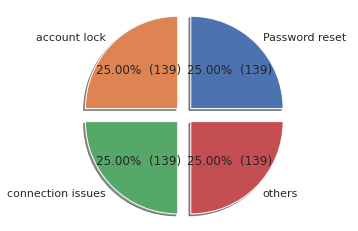

In [58]:
def plot_pie(y):
    """ a function to plot the pie chart showing the percentage of data in differnt topics after LDA"""
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

# Instantiate the UnderSampler class
sampling_strategy = 'auto'
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=0)
# Fit the data
X_res, y_res = rus.fit_resample(X_sam,y_sam)
print('Information of the data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

In [59]:
#converting the above output numpy array to dataframe for further processing.
col_names = X_sam.columns
X_res  = pd.DataFrame(X_res,columns = col_names)
y_res = pd.DataFrame(y_res,columns = ['Topic'])
type(y_res),type(X_res)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [60]:
# Combine Topic and Assignment Group columns
grp0_df = pd.concat([X_res, y_res], axis=1)
grp0_df.shape

(556, 2)

In [0]:
grp0_df["Assignment group"] = 'GRP_0'
grp0_df.drop(['Topic'], axis=1, inplace=True)

In [62]:
print(grp0_df.columns)
print(grp0_df['Assignment group'].head())
print("Total size of GRP_0 tickets after LDA:",grp0_df.shape)

Index(['ticket_Desc_lemm', 'Assignment group'], dtype='object')
0    GRP_0
1    GRP_0
2    GRP_0
3    GRP_0
4    GRP_0
Name: Assignment group, dtype: object
Total size of GRP_0 tickets after LDA: (556, 2)


In [63]:
#Create a dataframe exluding the GRP_0 tickets
df_excl_grp0 = df_train[df_train['Assignment group'] != 'GRP_0']

# Join the undersampled GRP_0 dataset to the excluded dataset
df = pd.concat([grp0_df, df_excl_grp0]).reset_index(drop=True)
df.shape

(4167, 2)

In [64]:
print(df.columns)
df[df["Assignment group"] == 'GRP_0'].count()

Index(['ticket_Desc_lemm', 'Assignment group'], dtype='object')


ticket_Desc_lemm    556
Assignment group    556
dtype: int64

#### Lets visualize the assignment groups distribution after balancing

Unique groups remaining: 36


Text(0.5, 1.0, 'Frquency of Assignment Groups after undersampling and clubbing')

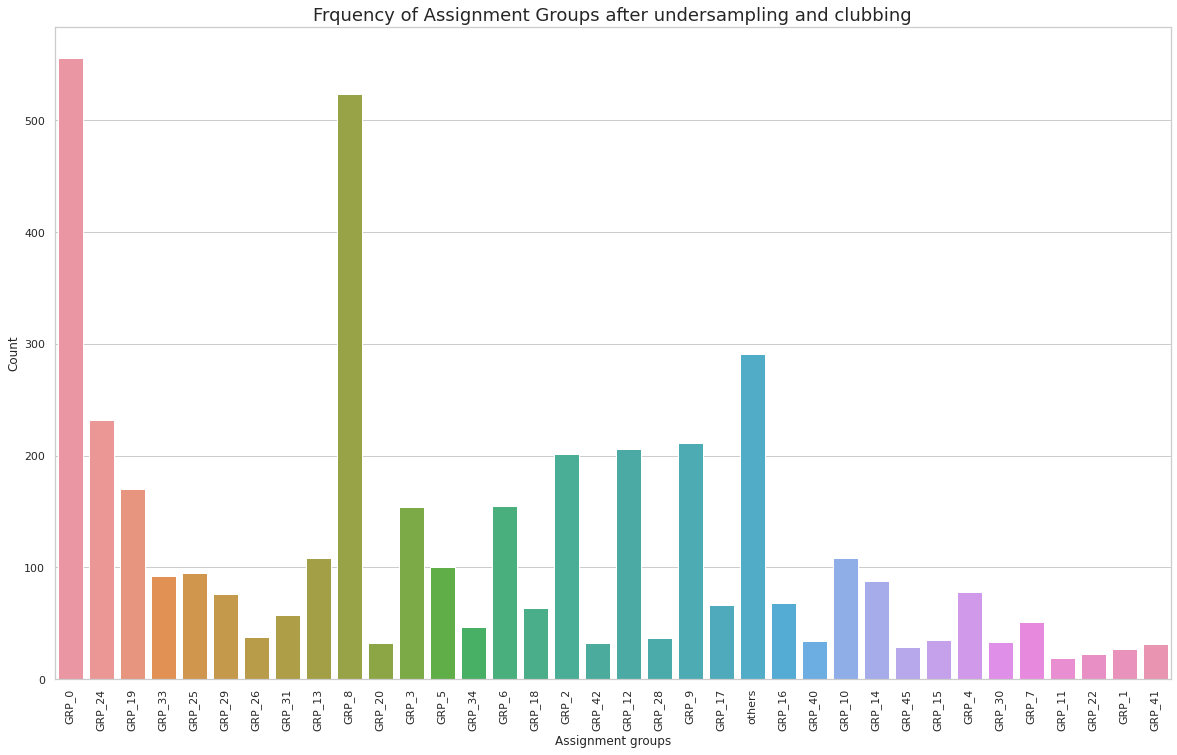

In [65]:
print('Unique groups remaining:', df['Assignment group'].nunique())
plt.figure(figsize=(20,12))
sns.set_style("whitegrid")
sns.countplot(df['Assignment group'])
plt.xticks(rotation=90)
plt.xlabel("Assignment groups")
plt.ylabel("Count")
plt.title("Frquency of Assignment Groups after undersampling and clubbing",fontsize=18)

In [66]:
#Creating the training datasets after undersampling
X_train = df["ticket_Desc_lemm"]
y_train = df["Assignment group"]
X_train.shape,y_train.shape

((4167,), (4167,))

In [67]:
#Tokenize the data for the model
X_train=tokenizer.texts_to_sequences(df['ticket_Desc_lemm'])
X_train = pad_sequences(X_train, padding='post',maxlen = maxlen)
X_test=tokenizer.texts_to_sequences(ticket_df['ticket_Desc_lemm'])
X_test = pad_sequences(X_test, padding='post',maxlen = maxlen)
y_train = pd.get_dummies(df['Assignment group']).values
y_test= pd.get_dummies(ticket_df['Assignment group']).values
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4167, 300), (4167, 36), (8491, 300), (8491, 36))

In [74]:
#Bidirectional model with merge_mode="sum" and kernel_initializer as 'GlorotNormal()'
model = Sequential()
model.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model.add(Dense(100, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.1))
model.add(Dense(36, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 200)          3564600   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 300, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               240800    
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                3636      
Total params: 3,819,136
Trainable params: 254,536
Non-trainable params: 3,564,600
______________________________________

In [0]:
#Configure the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
history_B = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[modelcheckpoint,EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/20
70/70 [==============================] - 290s 4s/step - loss: 2.8861 - accuracy: 0.2510 - val_loss: 1.9600 - val_accuracy: 0.5282
Epoch 2/20
70/70 [==============================] - 290s 4s/step - loss: 2.2669 - accuracy: 0.3653 - val_loss: 1.8452 - val_accuracy: 0.4912
Epoch 3/20
70/70 [==============================] - 289s 4s/step - loss: 2.0280 - accuracy: 0.4092 - val_loss: 1.5183 - val_accuracy: 0.5644
Epoch 4/20
70/70 [==============================] - 289s 4s/step - loss: 1.8723 - accuracy: 0.4401 - val_loss: 1.5454 - val_accuracy: 0.5535
Epoch 5/20
70/70 [==============================] - 290s 4s/step - loss: 1.7340 - accuracy: 0.4730 - val_loss: 1.4487 - val_accuracy: 0.5627
Epoch 6/20
70/70 [==============================] - 290s 4s/step - loss: 1.6355 - accuracy: 0.5068 - val_loss: 1.4898 - val_accuracy: 0.5512
Epoch 7/20
70/70 [==============================] - 291s 4s/step - loss: 1.5339 - accuracy: 0.5128 - val_loss: 1.2471 - val_accuracy: 0.6310
Epoch 8/20
70

In [0]:
model.load_weights(output_dir+"/weights.19.hdf5")    # saving the weights 

In [82]:
acc_test =model.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

266/266 [==============================] - 98s 367ms/step - loss: 1.2337 - accuracy: 0.6851
Test Accuracy: 0.6850783228874207
131/131 [==============================] - 48s 367ms/step - loss: 0.5218 - accuracy: 0.8411
Train Accuracy: 0.8411327004432678


In [0]:
y_predB = model.predict(X_test)

In [86]:
groups = ticket_df['Assignment group'].unique()
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_predB.argmax(axis=1),target_names=groups)))

Classification report:
               precision    recall  f1-score   support

       GRP_0       0.96      0.61      0.75      3968
       GRP_1       1.00      0.42      0.59        31
       GRP_3       0.61      0.47      0.53       140
       GRP_4       0.60      0.70      0.65        30
       GRP_5       0.62      0.79      0.70       257
       GRP_6       0.72      0.83      0.77       145
       GRP_7       0.72      0.78      0.75       118
       GRP_8       0.69      0.90      0.78        39
       GRP_9       0.56      0.79      0.66        85
      GRP_10       0.84      1.00      0.92        81
      GRP_11       0.81      0.77      0.79        88
      GRP_12       0.47      0.84      0.61       215
      GRP_13       0.51      0.88      0.64       241
      GRP_14       0.88      0.78      0.82        36
      GRP_15       0.48      0.77      0.59        31
      GRP_16       0.89      0.95      0.92       289
      GRP_17       0.54      0.84      0.66       116
   

**Plot the accuracy of the classfier**

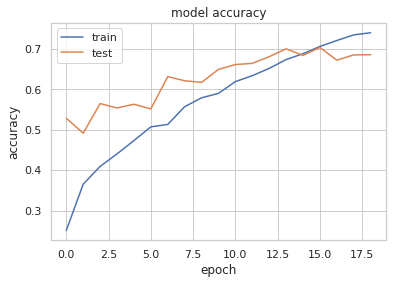

In [88]:
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot the Loss of the classifier**

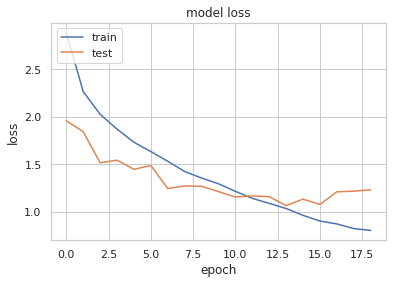

In [89]:
plt.plot(history_B.history['loss'])
plt.plot(history_B.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
#ROC-AUC Score of the Model:
"{:0.2f}".format(roc_auc_score(y_test,y_predB)*100.0)

'97.72'

**Lets tune this model further!**<br>
#### Changing the number of LSTM neurons from 100 to 150


In [70]:
#Bidirectional model with 150 LSTM neurons , merge_mode="sum" and kernel_initializer as 'GlorotNormal()'
model_chgNeur = Sequential()
model_chgNeur.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                        mask_zero=True,
                        trainable=False))
model_chgNeur.add(SpatialDropout1D(0.2))
model_chgNeur.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model_chgNeur.add(Dense(100, activation='relu', kernel_initializer=initializer))
model_chgNeur.add(Dropout(0.1))
model_chgNeur.add(Dense(36, activation='softmax'))
#Configure the model.
model_chgNeur.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_B1 = model_chgNeur.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[modelcheckpoint,EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/20
70/70 [==============================] - 219s 3s/step - loss: 2.8185 - accuracy: 0.2772 - val_loss: 1.9762 - val_accuracy: 0.4599
Epoch 2/20
70/70 [==============================] - 221s 3s/step - loss: 2.2078 - accuracy: 0.3777 - val_loss: 1.7211 - val_accuracy: 0.5031
Epoch 3/20
70/70 [==============================] - 222s 3s/step - loss: 1.9631 - accuracy: 0.4183 - val_loss: 1.4991 - val_accuracy: 0.5705
Epoch 4/20
70/70 [==============================] - 223s 3s/step - loss: 1.7776 - accuracy: 0.4615 - val_loss: 1.5305 - val_accuracy: 0.5474
Epoch 5/20
70/70 [==============================] - 225s 3s/step - loss: 1.6595 - accuracy: 0.5008 - val_loss: 1.4100 - val_accuracy: 0.5813
Epoch 6/20
70/70 [==============================] - 224s 3s/step - loss: 1.5462 - accuracy: 0.5342 - val_loss: 1.3282 - val_accuracy: 0.6104
Epoch 7/20
70/70 [==============================] - 224s 3s/step - loss: 1.4602 - accuracy: 0.5491 - val_loss: 1.2213 - val_accuracy: 0.6446
Epoch 8/20
70

In [71]:
acc_test =model_chgNeur.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model_chgNeur.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

266/266 [==============================] - 79s 296ms/step - loss: 1.0864 - accuracy: 0.7278
Test Accuracy: 0.7278294563293457
131/131 [==============================] - 38s 289ms/step - loss: 0.4295 - accuracy: 0.8613
Train Accuracy: 0.8612911105155945


In [0]:
y_predB1 = model_chgNeur.predict(X_test)

In [74]:
groups = ticket_df['Assignment group'].unique()
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_predB1.argmax(axis=1),target_names=groups)))

Classification report:
               precision    recall  f1-score   support

       GRP_0       0.96      0.69      0.80      3968
       GRP_1       0.67      0.52      0.58        31
       GRP_3       0.62      0.47      0.53       140
       GRP_4       0.44      0.77      0.56        30
       GRP_5       0.65      0.80      0.72       257
       GRP_6       0.78      0.83      0.81       145
       GRP_7       0.68      0.81      0.74       118
       GRP_8       0.89      0.87      0.88        39
       GRP_9       0.68      0.85      0.75        85
      GRP_10       0.90      1.00      0.95        81
      GRP_11       0.90      0.82      0.86        88
      GRP_12       0.42      0.88      0.57       215
      GRP_13       0.62      0.88      0.73       241
      GRP_14       0.76      0.78      0.77        36
      GRP_15       0.40      0.87      0.55        31
      GRP_16       0.94      0.95      0.94       289
      GRP_17       0.56      0.84      0.67       116
   

**Plot the accuracy of the classifier**

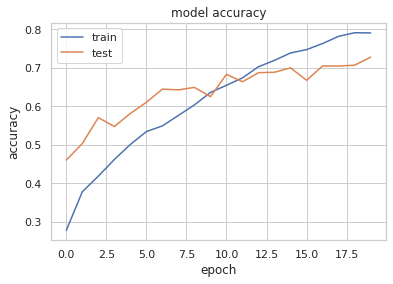

In [75]:
plt.plot(history_B1.history['accuracy'])
plt.plot(history_B1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot Loss of the classifier**

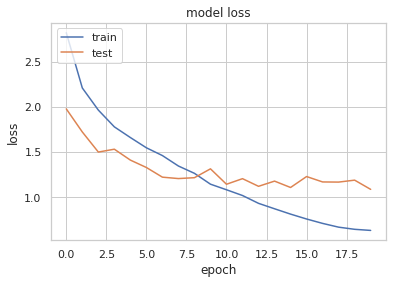

In [76]:
plt.plot(history_B1.history['loss'])
plt.plot(history_B1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
#ROC-AUC Score of the Model:
"{:0.2f}".format(roc_auc_score(y_test,y_predB1)*100.0)

'97.91'

#### Changing the maxlen from 300 to 150

In [0]:
maxlen= 150
#Now lets reinitialize and do padding the training and testing dataset 
X_train=tokenizer.texts_to_sequences(df['ticket_Desc_lemm'])
X_train = pad_sequences(X_train, padding='post',maxlen = maxlen)
X_test=tokenizer.texts_to_sequences(ticket_df['ticket_Desc_lemm'])
X_test = pad_sequences(X_test, padding='post',maxlen = maxlen)
y_train = pd.get_dummies(df['Assignment group']).values
y_test= pd.get_dummies(ticket_df['Assignment group']).values

In [80]:
#Bidirectional model with maxlen = 150 ,merge_mode="sum" and kernel_initializer as 'GlorotNormal()'
model_chgLen = Sequential()
model_chgLen.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_chgLen.add(SpatialDropout1D(0.2))
model_chgLen.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model_chgLen.add(Dense(100, activation='relu', kernel_initializer=initializer))
model_chgLen.add(Dropout(0.1))
model_chgLen.add(Dense(36, activation='softmax'))
#Configure the model.
model_chgLen.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Run the model
history_B2 = model_chgLen.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[modelcheckpoint,EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/20
70/70 [==============================] - 115s 2s/step - loss: 2.7839 - accuracy: 0.2695 - val_loss: 2.1028 - val_accuracy: 0.4265
Epoch 2/20
70/70 [==============================] - 116s 2s/step - loss: 2.1833 - accuracy: 0.3813 - val_loss: 1.7660 - val_accuracy: 0.4929
Epoch 3/20
70/70 [==============================] - 113s 2s/step - loss: 1.9560 - accuracy: 0.4204 - val_loss: 1.5379 - val_accuracy: 0.5519
Epoch 4/20
70/70 [==============================] - 115s 2s/step - loss: 1.7736 - accuracy: 0.4624 - val_loss: 1.4038 - val_accuracy: 0.5832
Epoch 5/20
70/70 [==============================] - 113s 2s/step - loss: 1.6339 - accuracy: 0.4980 - val_loss: 1.3808 - val_accuracy: 0.5823
Epoch 6/20
70/70 [==============================] - 110s 2s/step - loss: 1.5319 - accuracy: 0.5299 - val_loss: 1.3113 - val_accuracy: 0.6139
Epoch 7/20
70/70 [==============================] - 114s 2s/step - loss: 1.4178 - accuracy: 0.5587 - val_loss: 1.3109 - val_accuracy: 0.6053
Epoch 8/20
70

In [81]:
acc_test =model_chgLen.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model_chgLen.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

266/266 [==============================] - 39s 148ms/step - loss: 1.0811 - accuracy: 0.7215
Test Accuracy: 0.7214698195457458
131/131 [==============================] - 20s 152ms/step - loss: 0.4210 - accuracy: 0.8637
Train Accuracy: 0.8636909127235413


In [0]:
y_predB2 = model_chgLen.predict(X_test)

In [83]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_predB2.argmax(axis=1),target_names=groups)))

Classification report:
               precision    recall  f1-score   support

       GRP_0       0.96      0.67      0.79      3968
       GRP_1       0.49      0.61      0.54        31
       GRP_3       0.78      0.46      0.58       140
       GRP_4       0.81      0.70      0.75        30
       GRP_5       0.72      0.82      0.77       257
       GRP_6       0.74      0.85      0.79       145
       GRP_7       0.66      0.80      0.72       118
       GRP_8       0.69      0.92      0.79        39
       GRP_9       0.43      0.87      0.57        85
      GRP_10       0.75      1.00      0.86        81
      GRP_11       0.83      0.82      0.82        88
      GRP_12       0.48      0.87      0.61       215
      GRP_13       0.61      0.90      0.72       241
      GRP_14       0.61      0.83      0.71        36
      GRP_15       0.46      0.77      0.58        31
      GRP_16       0.90      0.97      0.93       289
      GRP_17       0.68      0.79      0.73       116
   

**Plot Accuracy of the classifier**

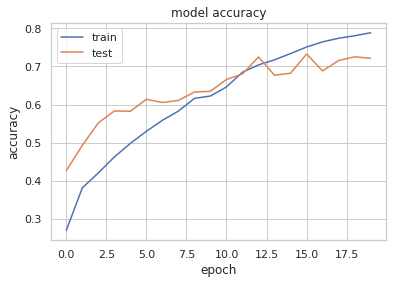

In [84]:
plt.plot(history_B2.history['accuracy'])
plt.plot(history_B2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot Loss of the Classifier**

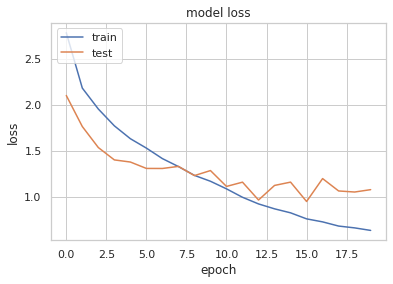

In [85]:
plt.plot(history_B2.history['loss'])
plt.plot(history_B2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
#ROC-AUC Score of the Model:
"{:0.2f}".format(roc_auc_score(y_test,y_predB2)*100.0)

'97.91'

# Conclusion.

In this project, a model based on supervised machine learning algorithms is proposed to assign tickets automatically.Preprocessed dataset consisting of previously categorized tickets are used to train classification algorithms.
We have implemented different classification algorithms to evaluate performances comparatively. We tried tuning the model using different hyper parameters for better performance.
<br>

Model Tuning Steps| F1 Score
--- | ---
Bidirectional LSTM[100 LSTM neurons,maxlen=300]	 | 0.58
Bidirectional LSTM[100 LSTM neurons,maxlen=300,merge-mode='sum'] | 0.60
Bidirectional LSTM[100 LSTM neurons,maxlen=300,merge_mode="sum",with L1,L2 regularizer in the dense layer] |0.50
Bidirectional LSTM[100 neurons,merge-code='sum',kernel_initialiazer=GlorotNormal() in Dense layer] | 0.57

**State of the Art NLP Model:**

Model | F1 Score
--- | ---
BERT[Uncased: 12-layer, 768-hidden, 12-heads] | 0.64

<br>

**After Clubbing minority groups and undersampling GRP_0 in the training set :**

Model Tuning Steps| F1 Score | ROC-AUC Score
--- | --- |---
Bidirectional LSTM[100 LSTM neurons,maxlen=300,merge-code='sum',kernel_initialiazer=GlorotNormal in Dense layer] | 0.69 | 97.72
Bidirectional LSTM[150 LSTM neurons,maxlen=300,merge-code='sum',kernel_initialiazer=GlorotNormal in Dense layer] | 0.73| 97.91
Bidirectional LSTM[150 LSTM neurons,maxlen=150,merge-code='sum',kernel_initialiazer=GlorotNormal  in Dense layer] | 0.73| 97.91


## This notebook is hosted on Github
https://github.com/rishinarang007/NLP-Automatic-Ticket-Assignment